<a href="https://colab.research.google.com/github/LRicardp/Indonesian-Presidential-Election-Sentiment-Analysis/blob/main/First_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HELLO
This is my scientific paper project to study sentiment analysis towards Indonesia's presidential candidates 2024. The dataset is collected from firdaus, asno (2023), “Indonesia Presidential Candidate's Dataset, 2024”, Mendeley Data, V5, doi: 10.17632/7w5zvr8jgp.5 . I personally found the dataset from Kaggle [https://www.kaggle.com/datasets/jocelyndumlao/indonesia-presidential-candidates-dataset-2024]. The dataset consists of 30,000 tweets, already categorized according to the each candidate, and labeled as positive and negative.

With this dataset, I am analyzing words in every candidates sentiment. I used Naive Bayes here and used BERT to compare the result. I used BERT in different notebook.


# DATASET

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [ ]:
import scipy.sparse as sp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
anies = pd.read_csv('/content/drive/MyDrive/Semester 7 /Proyek Artikel Ilmiah/labeled data/Anies Baswedan.csv')
ganjar = pd.read_csv('/content/drive/MyDrive/Semester 7 /Proyek Artikel Ilmiah/labeled data/Ganjar Pranowo.csv')
prabowo = pd.read_csv('/content/drive/MyDrive/Semester 7 /Proyek Artikel Ilmiah/labeled data/Prabowo Subianto.csv')

In [ ]:
anies

Unnamed: 0.1                        Date                     Created  \
0                0   2023-04-16 10:04:35+00:00   2023-03-27 08:59:57+00:00   
1                1   2023-04-16 10:00:01+00:00   2012-08-21 07:34:04+00:00   
2                2   2023-04-16 09:14:46+00:00   2011-09-27 05:22:24+00:00   
3                3   2023-04-16 07:03:05+00:00   2017-10-19 12:32:28+00:00   
4                4   2023-04-16 06:03:59+00:00   2022-06-28 07:03:37+00:00   
...            ...                         ...                         ...   
9995          9995   2023-01-05 15:36:41+00:00   2018-11-29 01:36:00+00:00   
9996          9996   2023-01-05 15:16:04+00:00   2018-11-29 01:36:00+00:00   
9997          9997   2023-01-05 15:12:51+00:00   2022-05-16 12:14:47+00:00   
9998          9998   2023-01-05 15:07:34+00:00   2022-12-15 23:43:16+00:00   
9999          9999   2023-01-05 15:06:28+00:00   2010-07-02 14:30:17+00:00   

           User ID   Followers   Following   Tweet Count  \
0     1.640000e+18         981         531            22   
1     7.710306e+08       10702         123         30121   
2     3.807551e+08          11          35           230   
3     9.210000e+17          37          47          2670   
4     1.540000e+18           6         129           766   
...            ...         ...         ...           ...   
9995  1.070000e+18        1265         763        541856   
9996  1.070000e+18        1265         763        541856   
9997  1.530000e+18           1          17           771   
9998  1.600000e+18          30         256          3174   
9999  1.620599e+08        4718        4710         27208   

                 TweetLocation  \
0                          NaN   
1            Palmerah, Jakarta   
2                North Jakarta   
3                      Jakarta   
4                Lebak, Banten   
...                        ...   
9995                       NaN   
9996                       NaN   
9997                    Monaco   
9998   Central Java, Indonesia   
9999                 INDONESIA   

                                                   Text     label  
0                                  anies president info  Positive  
1     gerindra party politician sandiaga uno answers...  Positive  
2     mr. anies continued, we will guard him until h...  Positive  
3     may allah swt save the nation and state of the...  Positive  
4     poor chotimah, uncle anies, that's why my fami...  Positive  
...                                                 ...       ...  
9995  there was no turmoil during the construction o...  Negative  
9996  ubedilah mahfud md, the brain behind the cipta...  Negative  
9997                               my president mranies  Negative  
9998                                 mr anies president  Negative  
9999  who do you vote for president anies baswedan p...  Negative  

[10000 rows x 10 columns]

In [ ]:
df = pd.concat([anies.assign(Candidate='Anies Baswedan'),
                prabowo.assign(Candidate = 'Prabowo Subianto'),
                ganjar.assign(Candidate = 'Ganjar Pranowo')])

## Exploratory Data Analysis

In [ ]:
df.head()

Unnamed: 0.1                        Date                     Created  \
0           0.0   2023-04-16 10:04:35+00:00   2023-03-27 08:59:57+00:00   
1           1.0   2023-04-16 10:00:01+00:00   2012-08-21 07:34:04+00:00   
2           2.0   2023-04-16 09:14:46+00:00   2011-09-27 05:22:24+00:00   
3           3.0   2023-04-16 07:03:05+00:00   2017-10-19 12:32:28+00:00   
4           4.0   2023-04-16 06:03:59+00:00   2022-06-28 07:03:37+00:00   

        User ID   Followers   Following   Tweet Count       TweetLocation  \
0  1.640000e+18         981         531            22                 NaN   
1  7.710306e+08       10702         123         30121   Palmerah, Jakarta   
2  3.807551e+08          11          35           230       North Jakarta   
3  9.210000e+17          37          47          2670             Jakarta   
4  1.540000e+18           6         129           766       Lebak, Banten   

                                                Text     label  \
0                               anies president info  Positive   
1  gerindra party politician sandiaga uno answers...  Positive   
2  mr. anies continued, we will guard him until h...  Positive   
3  may allah swt save the nation and state of the...  Positive   
4  poor chotimah, uncle anies, that's why my fami...  Positive   

        Candidate  Unnamed: 0  
0  Anies Baswedan         NaN  
1  Anies Baswedan         NaN  
2  Anies Baswedan         NaN  
3  Anies Baswedan         NaN  
4  Anies Baswedan         NaN

In [ ]:
df = df.loc[:, [' Tweet Count', 'Text', 'label', 'Candidate']]
df = df.dropna()
df

Tweet Count                                               Text  \
0               22                               anies president info   
1            30121  gerindra party politician sandiaga uno answers...   
2              230  mr. anies continued, we will guard him until h...   
3             2670  may allah swt save the nation and state of the...   
4              766  poor chotimah, uncle anies, that's why my fami...   
...            ...                                                ...   
9995           414  rt ganjaristdltras ganjarist deltras east java...   
9996          3662               meaning reward pranowo the president   
9997          2245  more and more people are ready to support ganj...   
9998            25  rt ganjaristdltras ganjarist deltras east java...   
9999           202  happy national aviation day october, fly high ...   

         label       Candidate  
0     Positive  Anies Baswedan  
1     Positive  Anies Baswedan  
2     Positive  Anies Baswedan  
3     Positive  Anies Baswedan  
4     Positive  Anies Baswedan  
...        ...             ...  
9995  Positive  Ganjar Pranowo  
9996  Positive  Ganjar Pranowo  
9997  Positive  Ganjar Pranowo  
9998  Positive  Ganjar Pranowo  
9999  Positive  Ganjar Pranowo  

[29728 rows x 4 columns]

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 29728 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Tweet Count  29728 non-null  int64 
 1   Text          29728 non-null  object
 2   label         29728 non-null  object
 3   Candidate     29728 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


Tweet Count                                               Text     label  \
0            22                               anies president info  Positive   
1         30121  gerindra party politician sandiaga uno answers...  Positive   
2           230  mr. anies continued, we will guard him until h...  Positive   
3          2670  may allah swt save the nation and state of the...  Positive   
4           766  poor chotimah, uncle anies, that's why my fami...  Positive   

        Candidate  
0  Anies Baswedan  
1  Anies Baswedan  
2  Anies Baswedan  
3  Anies Baswedan  
4  Anies Baswedan

## Cleaning Data

In [ ]:
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text
#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)
#Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

In [ ]:
text_new = []
for t in df.Text:
    text_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))

df['clean_text'] = text_new

In [ ]:
df

Tweet Count                                               Text  \
0               22                               anies president info   
1            30121  gerindra party politician sandiaga uno answers...   
2              230  mr. anies continued, we will guard him until h...   
3             2670  may allah swt save the nation and state of the...   
4              766  poor chotimah, uncle anies, that's why my fami...   
...            ...                                                ...   
9995           414  rt ganjaristdltras ganjarist deltras east java...   
9996          3662               meaning reward pranowo the president   
9997          2245  more and more people are ready to support ganj...   
9998            25  rt ganjaristdltras ganjarist deltras east java...   
9999           202  happy national aviation day october, fly high ...   

         label       Candidate  \
0     Positive  Anies Baswedan   
1     Positive  Anies Baswedan   
2     Positive  Anies Baswedan   
3     Positive  Anies Baswedan   
4     Positive  Anies Baswedan   
...        ...             ...   
9995  Positive  Ganjar Pranowo   
9996  Positive  Ganjar Pranowo   
9997  Positive  Ganjar Pranowo   
9998  Positive  Ganjar Pranowo   
9999  Positive  Ganjar Pranowo   

                                             clean_text  
0                                  anies president info  
1     gerindra party politician sandiaga uno answers...  
2     mr anies continued we will guard him until he ...  
3     may allah swt save the nation and state of the...  
4     poor chotimah uncle anies thats why my family ...  
...                                                 ...  
9995  rt ganjaristdltras ganjarist deltras east java...  
9996               meaning reward pranowo the president  
9997  more and more people are ready to support ganj...  
9998  rt ganjaristdltras ganjarist deltras east java...  
9999  happy national aviation day october fly high w...  

[29728 rows x 5 columns]

In [ ]:
df['label'] = df['label'].map({'Positive':1, 'Negative':0})

In [ ]:
df['label'].value_counts()

label
1    21654
0     8074
Name: count, dtype: int64

In [ ]:
df

Tweet Count                                               Text  label  \
0               22                               anies president info      1   
1            30121  gerindra party politician sandiaga uno answers...      1   
2              230  mr. anies continued, we will guard him until h...      1   
3             2670  may allah swt save the nation and state of the...      1   
4              766  poor chotimah, uncle anies, that's why my fami...      1   
...            ...                                                ...    ...   
9995           414  rt ganjaristdltras ganjarist deltras east java...      1   
9996          3662               meaning reward pranowo the president      1   
9997          2245  more and more people are ready to support ganj...      1   
9998            25  rt ganjaristdltras ganjarist deltras east java...      1   
9999           202  happy national aviation day october, fly high ...      1   

           Candidate                                         clean_text  
0     Anies Baswedan                               anies president info  
1     Anies Baswedan  gerindra party politician sandiaga uno answers...  
2     Anies Baswedan  mr anies continued we will guard him until he ...  
3     Anies Baswedan  may allah swt save the nation and state of the...  
4     Anies Baswedan  poor chotimah uncle anies thats why my family ...  
...              ...                                                ...  
9995  Ganjar Pranowo  rt ganjaristdltras ganjarist deltras east java...  
9996  Ganjar Pranowo               meaning reward pranowo the president  
9997  Ganjar Pranowo  more and more people are ready to support ganj...  
9998  Ganjar Pranowo  rt ganjaristdltras ganjarist deltras east java...  
9999  Ganjar Pranowo  happy national aviation day october fly high w...  

[29728 rows x 5 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29728 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Tweet Count  29728 non-null  int64 
 1   Text          29728 non-null  object
 2   label         29728 non-null  int64 
 3   Candidate     29728 non-null  object
 4   clean_text    29728 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
candidates = df['Candidate'].unique()
df_candidates = {candidate: df[df['Candidate'] == candidate] for candidate in candidates}

In [ ]:
df_anies = df_candidates['Anies Baswedan']
df_prabowo = df_candidates['Prabowo Subianto']
df_ganjar = df_candidates['Ganjar Pranowo']

In [ ]:
# Function for word clouds
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False, more_stopwords = None):
    stopwords = set(STOPWORDS)
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

d = '/content/drive/MyDrive/Semester 7 /Proyek Artikel Ilmiah/masks-wordclouds/'

# ANIES BASWEDAN
Anies's analysis part

## ANIES'S DATASET

In [ ]:
df_anies

Tweet Count                                               Text  label  \
0               22                               anies president info      1   
1            30121  gerindra party politician sandiaga uno answers...      1   
2              230  mr. anies continued, we will guard him until h...      1   
3             2670  may allah swt save the nation and state of the...      1   
4              766  poor chotimah, uncle anies, that's why my fami...      1   
...            ...                                                ...    ...   
9995        541856  there was no turmoil during the construction o...      0   
9996        541856  ubedilah mahfud md, the brain behind the cipta...      0   
9997           771                               my president mranies      0   
9998          3174                                 mr anies president      0   
9999         27208  who do you vote for president anies baswedan p...      0   

           Candidate                                         clean_text  
0     Anies Baswedan                               anies president info  
1     Anies Baswedan  gerindra party politician sandiaga uno answers...  
2     Anies Baswedan  mr anies continued we will guard him until he ...  
3     Anies Baswedan  may allah swt save the nation and state of the...  
4     Anies Baswedan  poor chotimah uncle anies thats why my family ...  
...              ...                                                ...  
9995  Anies Baswedan  there was no turmoil during the construction o...  
9996  Anies Baswedan  ubedilah mahfud md the brain behind the ciptak...  
9997  Anies Baswedan                               my president mranies  
9998  Anies Baswedan                                 mr anies president  
9999  Anies Baswedan  who do you vote for president anies baswedan p...  

[9931 rows x 5 columns]

In [ ]:
df_anies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9931 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Tweet Count  9931 non-null   int64 
 1   Text          9931 non-null   object
 2   label         9931 non-null   int64 
 3   Candidate     9931 non-null   object
 4   clean_text    9931 non-null   object
dtypes: int64(2), object(3)
memory usage: 465.5+ KB


In [ ]:
temp = df_anies.groupby('label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')

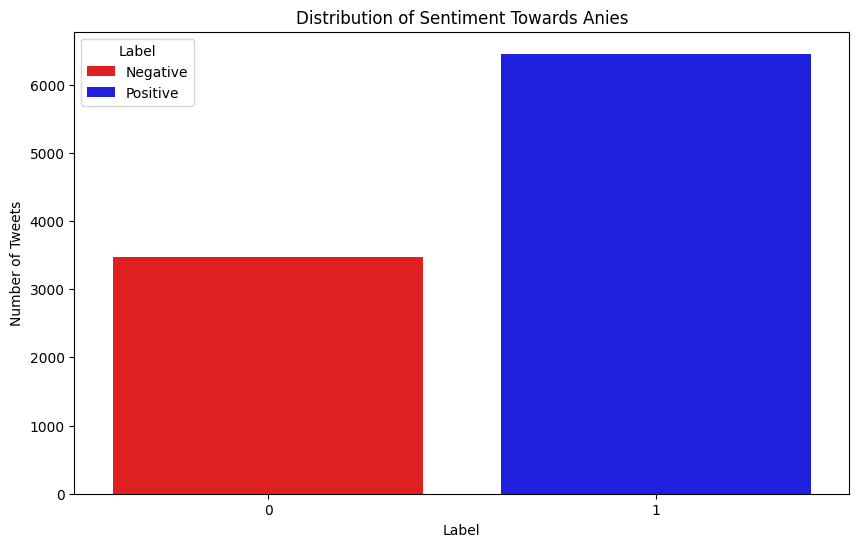

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='label',data=df_anies, hue='label', palette={1: 'blue', 0: 'red'})
plt.xlabel('Label')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Towards Anies')
plt.legend(title='Label', labels=['Negative', 'Positive'])
plt.show()

## WORD CLOUDS FOR ANIES BASWEDAN

In [ ]:
anies_positive_text = " ".join(df_anies[df_anies['label'] == 1]['clean_text'])
anies_negative_text = " ".join(df_anies[df_anies['label'] == 0]['clean_text'])

In [ ]:
anies_positive_text

'anies president info gerindra party politician sandiaga uno answers the question of being paired again with former dki jakarta governor anies baswedan in the upcoming presidential election mr anies continued we will guard him until he becomes president may allah swt save the nation and state of the republic of indonesia from traitors to the mandate of the people o allah the most merciful and the most merciful raise the rank of anies rasyid baswedan to become president of the republic of indonesia this year and beyond amen yra poor chotimah uncle anies thats why my family has decided to elect pa anies as president if there is no declaration from the supporting party then the results of this survey are useless the voice of the people who was the governor anies prabowo not surprised carry on yes we who are pro anies will always be outside the palace smart herianto anies is very suitable for the president of the republic of indonesia you are so busy managing our presidential candidate ani

In [ ]:
anies_negative_text

'pdip cadres become president where the minister is food imports amien rais will vote for prabowo subianto if anies baswedan fails to become a presidential candidate in the presidential election kpk moves for justice for all indonesian people can become governor because there is a party that supports him think about why you lost the official from your political party criticizes his party fahnoor inismyname bowo traitor rational people will not repeat the same mistakes together rg with the discourse of a large coalition consisting of five political parties supporting the palace anies looks like he is being attacked by anies party which is not a member of anies party well why are you afraid three parties from the coalition of change that supports anies baswedan are targeting the former governor of dki jakartas vote during the presidential election to reach a percentage in ta this is really asking is it true that the acting governor has been replaced by his name mr heru who has only been 

In [ ]:
positive_mask = np.array(Image.open(d + "star.png"))
negative_mask = np.array(Image.open(d + "user.png"))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Semester 7 /Proyek Artikel Ilmiah/masks-wordclouds/star.png'

In [ ]:
more_stopwords_anies = {'pk', 'pak', 'good', 'indonesia', 'Unknown', 'president',
                      'presidential', 'bang', 'mr', 'republic', 'indonesia',
                      'election', 'candidate', 'candidates','park', 'jimin',
                      'inismyname', 'dont', 'gangar', 'anies', 'rasyid',
                      'baswedan', 'will'}

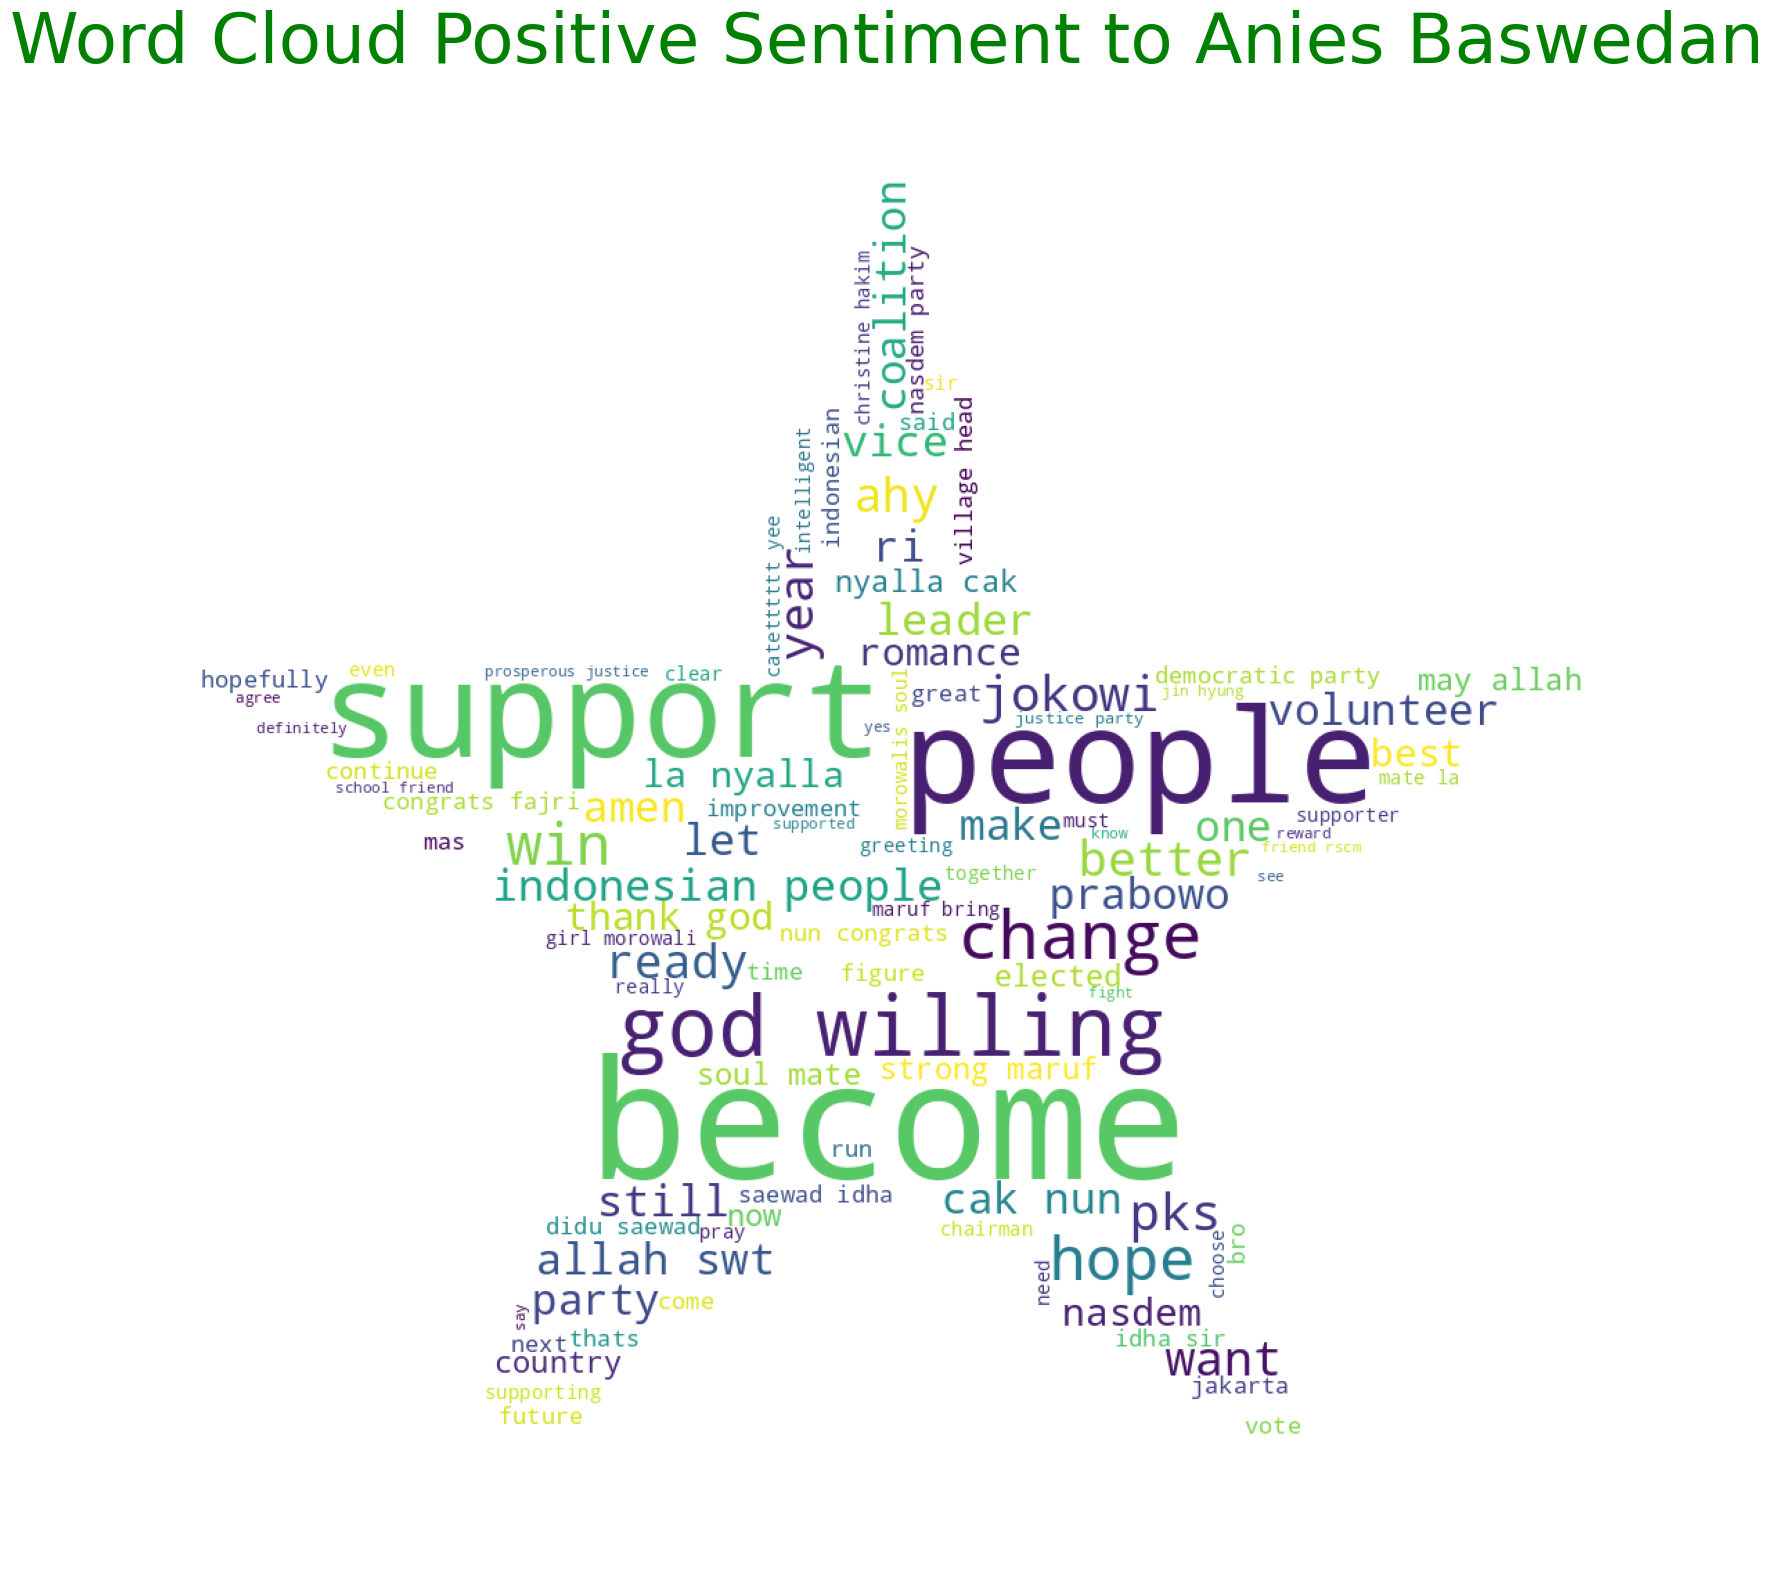

In [ ]:
#Positive cloud words about Anies Baswedan
plot_wordcloud(anies_positive_text, positive_mask, max_words=100, max_font_size= 120,
               title="Word Cloud Positive Sentiment to Anies Baswedan", title_size=50, more_stopwords=more_stopwords_anies)

<ipython-input-28-b43b5abbd736>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words), x=list(counts), palette="viridis")


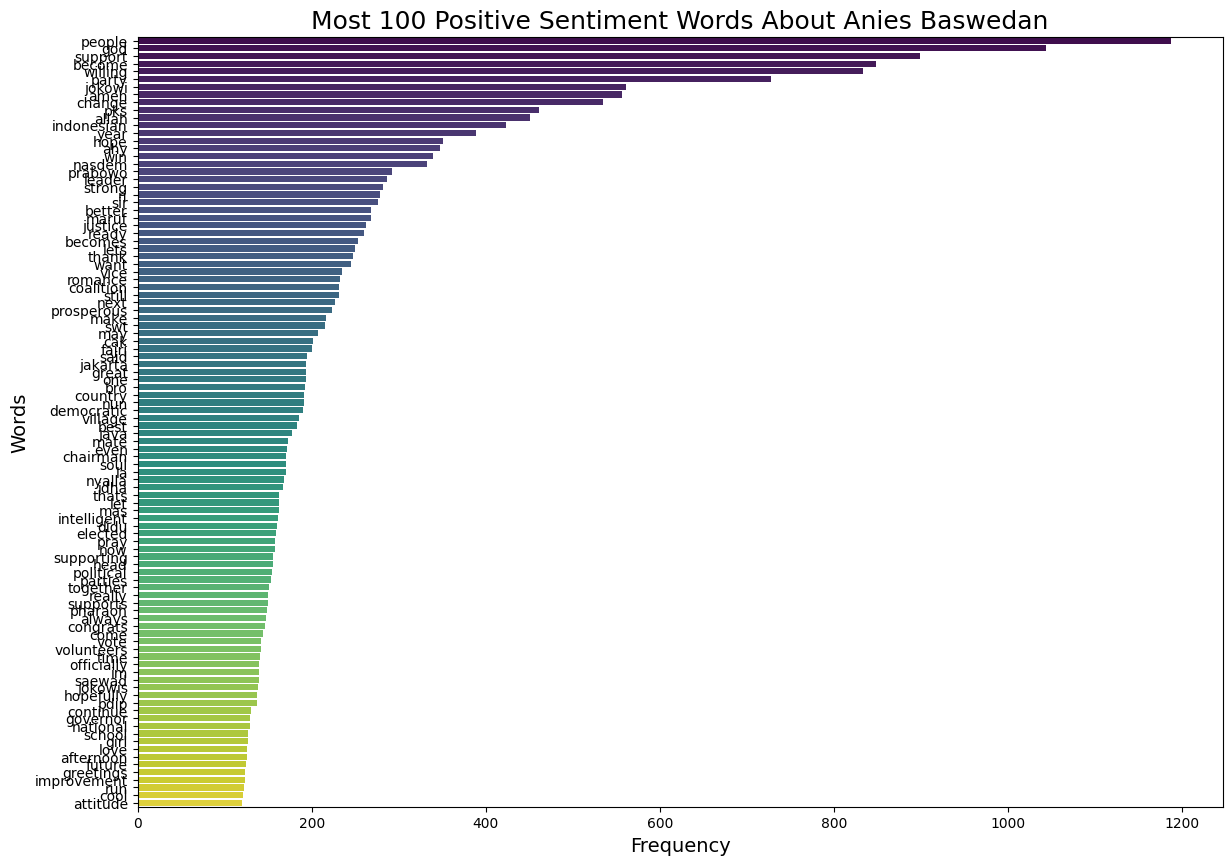

In [ ]:
from collections import Counter
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS).union(more_stopwords_anies)

words = [word.lower() for word in anies_positive_text.split() if word.lower() not in stopwords]

word_counts = Counter(words)

common_words = word_counts.most_common(100)
df_common_words = pd.DataFrame(common_words, columns=['Words', 'Frequency'])

#print(df_common_words)
words, counts = zip(*common_words)

plt.figure(figsize=(14,10))
sns.barplot(y=list(words), x=list(counts), palette="viridis")
plt.title('Most 100 Positive Sentiment Words About Anies Baswedan', fontsize=18)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


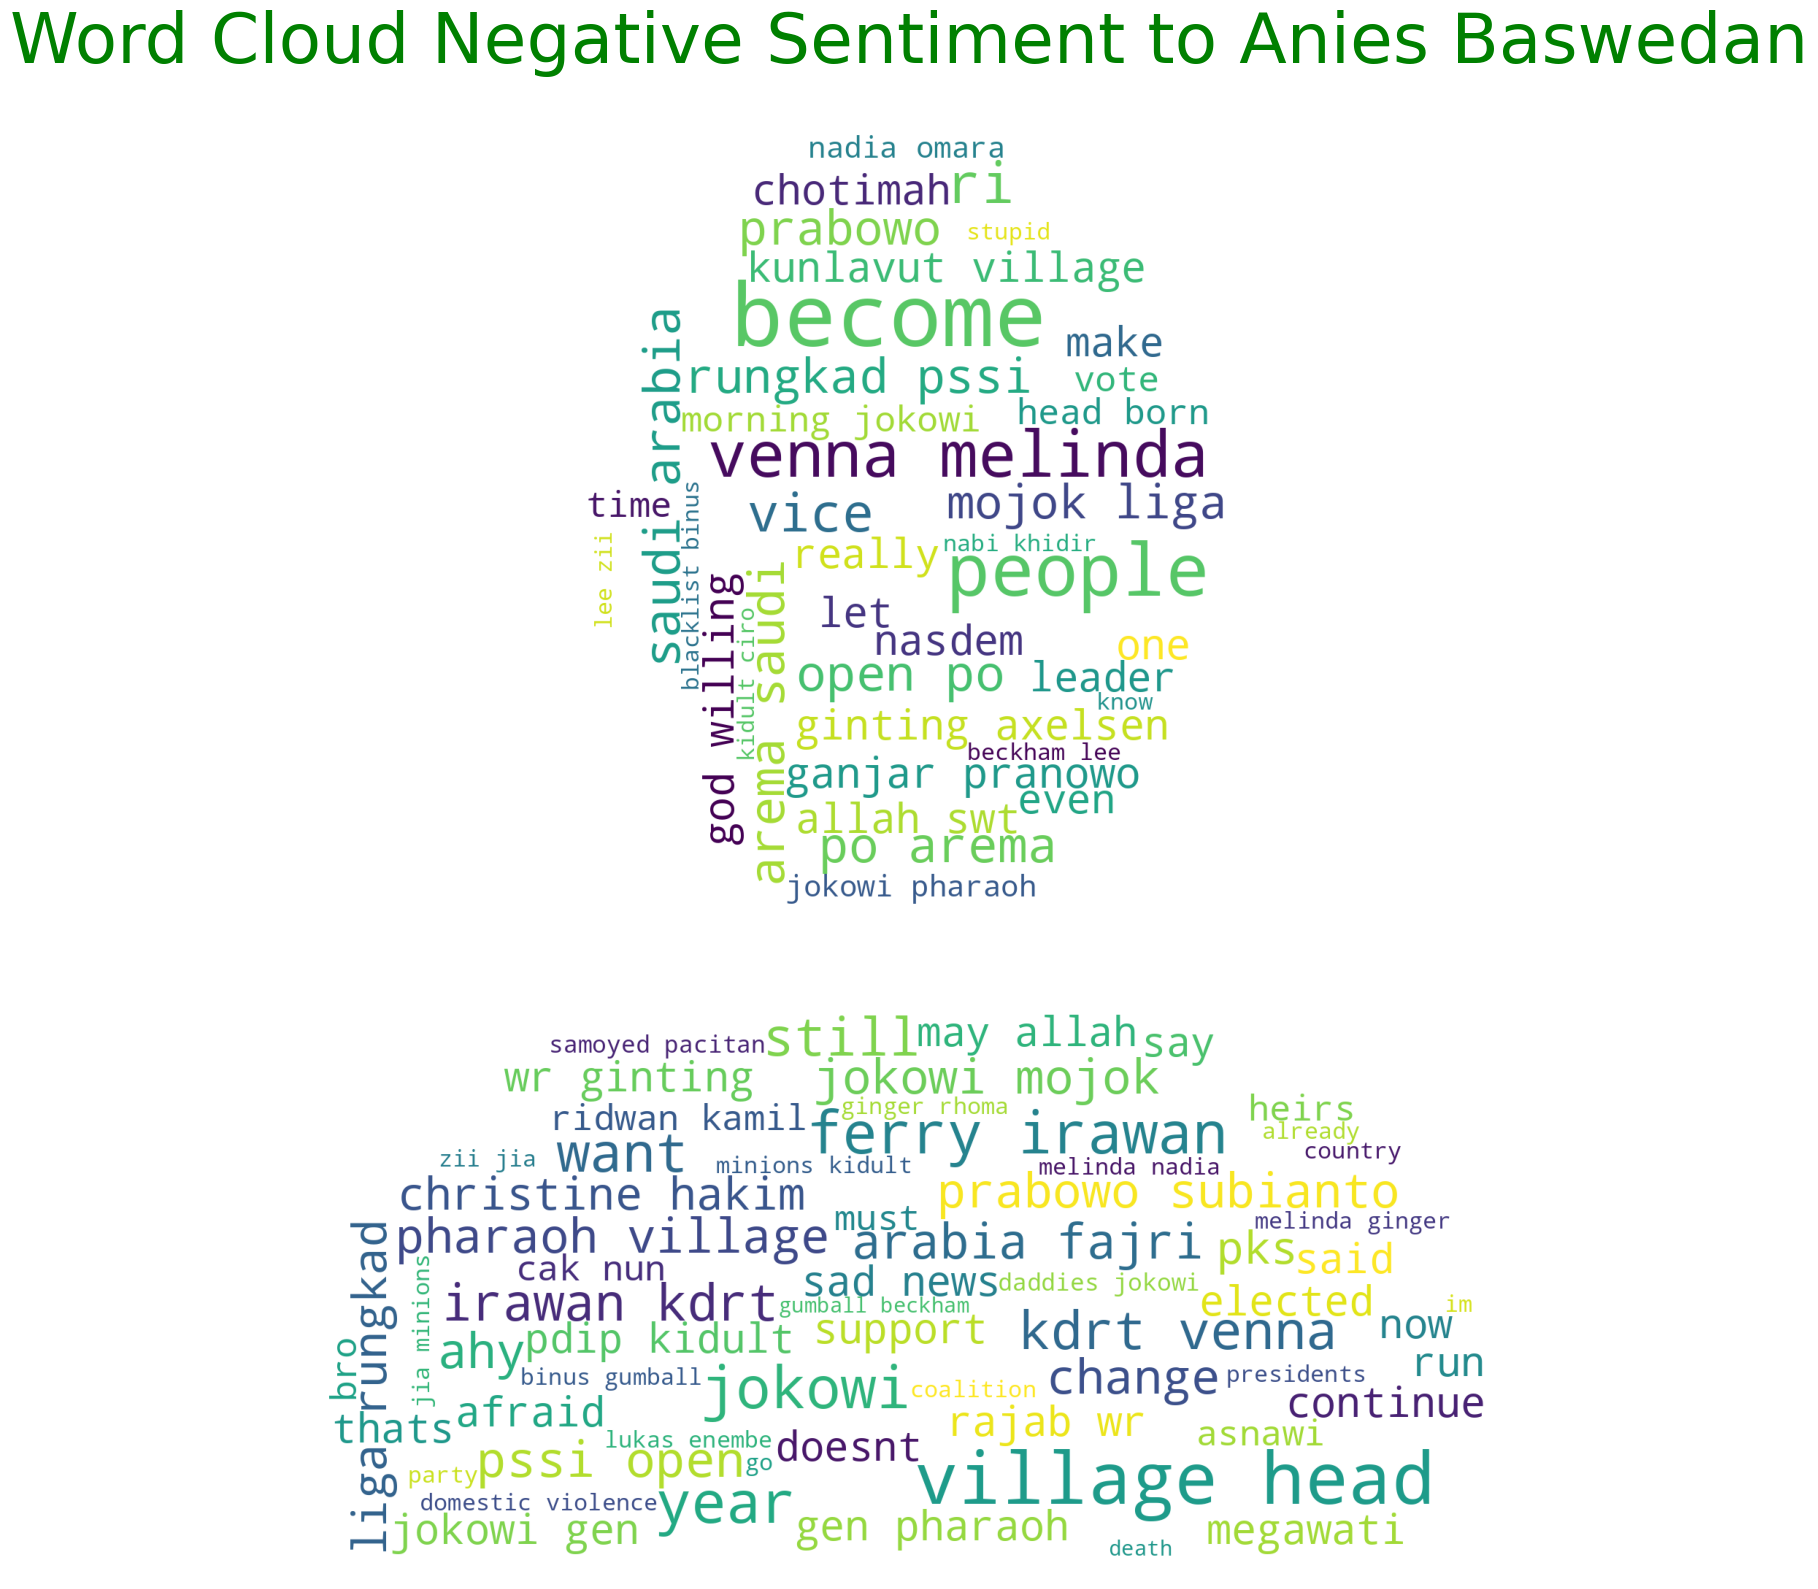

In [ ]:
#Negative cloud words about Anies Baswedan
plot_wordcloud(anies_negative_text, negative_mask, max_words=100, max_font_size= 120, title="Word Cloud Negative Sentiment to Anies Baswedan", title_size=50,
               more_stopwords=more_stopwords_anies)

<ipython-input-30-7fd004563ac8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words_counts_neg_anies), x=list(counts_words_neg_anies), palette="viridis")


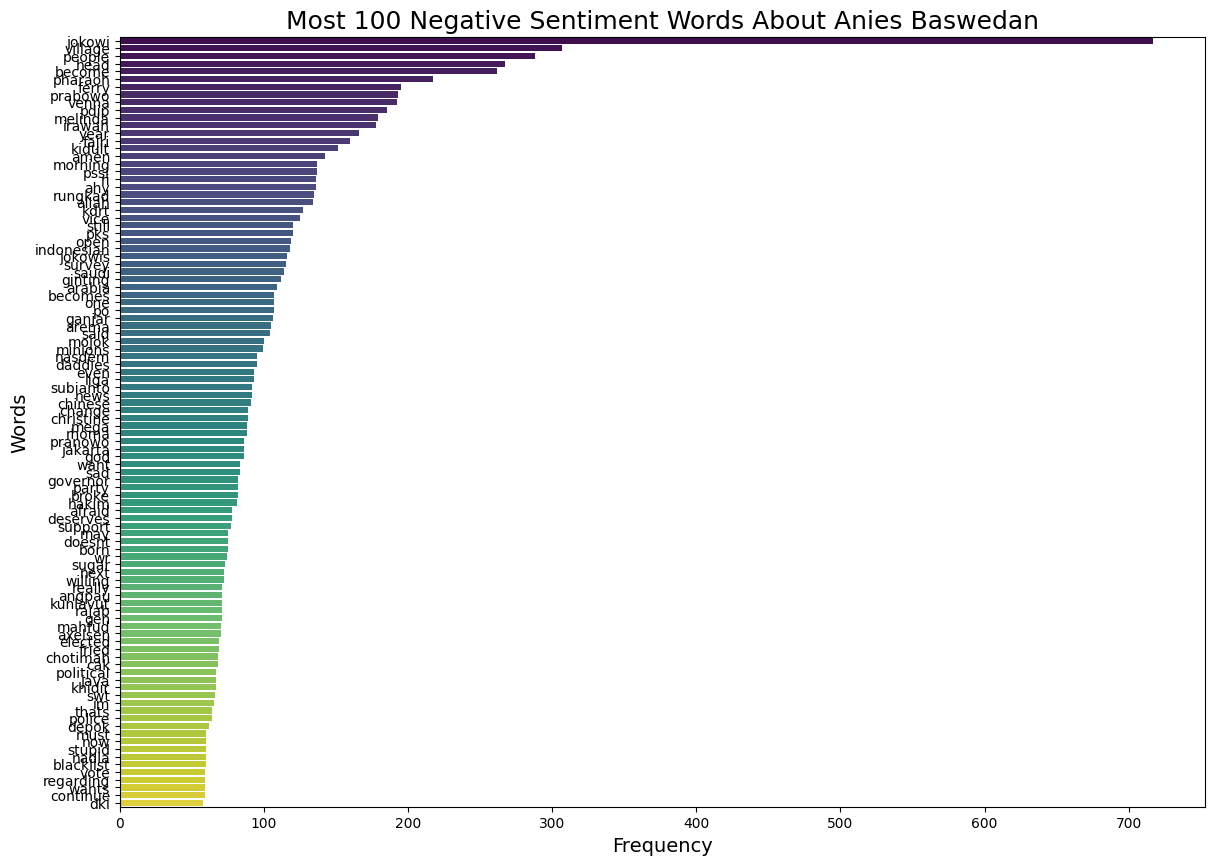

In [ ]:
anies_negative_words = [word.lower() for word in anies_negative_text.split() if word.lower() not in stopwords]

word_counts_neg_anies = Counter(anies_negative_words)

common_words_neg_anies = word_counts_neg_anies.most_common(100)
df_common_words_neg_anies = pd.DataFrame(common_words_neg_anies, columns=['Words', 'Frequency'])

#print(df_common_words_neg_anies)
words_counts_neg_anies, counts_words_neg_anies = zip(*common_words_neg_anies)

plt.figure(figsize=(14,10))
sns.barplot(y=list(words_counts_neg_anies), x=list(counts_words_neg_anies), palette="viridis")
plt.title('Most 100 Negative Sentiment Words About Anies Baswedan', fontsize=18)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

## SENTIMENT ANALYSIS ABOUT ANIES BASWEDAN
This section will dig deeper about sentiment about Anies from the dataset. The process will begin from balancing dataset, using Naive Bayes, using ...., and using BERT

### Preprocess
Balancing the dataset

In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [ ]:
ros = RandomOverSampler()
train_anies_x, train_anies_y = ros.fit_resample(np.array(df_anies[['clean_text']]).reshape(-1, 1), np.array(df_anies['label']).reshape(-1, 1));
train_anies_os = pd.DataFrame(list(zip([x[0] for x in train_anies_x], train_anies_y)),
                              columns=['clean_text', 'label']);
train_anies_os['label'].value_counts()

label
1    6454
0    6454
Name: count, dtype: int64

In [ ]:
# Train-validation-test split
X_anies = train_anies_os['clean_text'].values
y_anies = train_anies_os['label'].values

In [ ]:
# Split 0.6 training data and 0.4 temporary data
X_train_anies, X_temp_anies, y_train_anies, y_temp_anies = train_test_split(X_anies, y_anies, test_size=0.4, random_state=42)
# Split 0.2 validation data and 0.2 testing data
X_valid_anies, X_test_anies, y_valid_anies, y_test_anies = train_test_split(X_temp_anies, y_temp_anies, test_size=0.5, random_state=42)

In [ ]:
# Save the label-encoded target columns
y_train_anies_le = y_train_anies.copy()
y_valid_anies_le = y_valid_anies.copy()
y_test_anies_le = y_test_anies.copy()

In [ ]:
# One-hot encoding
ohe_anies = preprocessing.OneHotEncoder()
y_train_anies = ohe_anies.fit_transform(np.array(y_train_anies).reshape(-1, 1))
y_valid_anies = ohe_anies.transform(np.array(y_valid_anies).reshape(-1, 1))
y_test_anies = ohe_anies.transform(np.array(y_test_anies).reshape(-1, 1))

In [ ]:
print(f"ANIES'S TRAINING DATA: {X_train_anies.shape[0]}\nANIES'S VALIDATION DATA: {X_valid_anies.shape[0]}\nANIES'S TESTING DATA: {X_test_anies.shape[0]}" )

ANIES'S TRAINING DATA: 7744
ANIES'S VALIDATION DATA: 2582
ANIES'S TESTING DATA: 2582


### Naive Bayes For Anies Baswedan

In [ ]:
clf = CountVectorizer()
X_train_anies_cv = clf.fit_transform(X_train_anies)
X_test_anies_cv = clf.transform(X_test_anies)

In [ ]:
#TF-IDF (Term-frequency times inverse document-frequency) versions of the tokenized tweets
tf_anies_transformer = TfidfTransformer(use_idf=True).fit(X_train_anies_cv)
X_train_anies_tf = tf_anies_transformer.transform(X_train_anies_cv)
X_test_anies_tf = tf_anies_transformer.transform(X_test_anies_cv)

In [ ]:
nb_anies_clf = MultinomialNB()
nb_anies_clf.fit(X_train_anies_tf, y_train_anies_le)

MultinomialNB()

In [ ]:
nb_anies_pred = nb_anies_clf.predict(X_test_anies_tf)

In [ ]:
print('\tClassification Report for Anies Sentiment using Naive Bayes:\n\n',classification_report(y_test_anies_le,nb_anies_pred, target_names=['Negative', 'Positive']))

	Classification Report for Anies Sentiment using Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.85      0.71      0.77      1252
    Positive       0.76      0.88      0.82      1330

    accuracy                           0.80      2582
   macro avg       0.80      0.79      0.79      2582
weighted avg       0.80      0.80      0.79      2582



# PRABOWO SUBIANTO
Prabowo's analysis part

## PRABOWO'S DATASET

In [ ]:
df_prabowo

Tweet Count                                               Text  label  \
0            12568  gemira and semeton bali muslims declare suppor...      1   
1            63723  fahnoor inismyname that's why we support the p...      0   
2             6596  this time, jokowi's quota for wrinkles on his ...      1   
3             7395  happy birthday to kopassus, may the spirit of ...      1   
4              192  gerindra badung party held legislative legisla...      0   
...            ...                                                ...    ...   
9995          4398  sir, if the community always goes down, it wil...      1   
9996           131  young prabowo is really cool, bismillah sir, g...      1   
9997            67  basically, prabowo is great and was chosen as ...      1   
9998           103  optimistic about being the best figure in the ...      1   
9999           131  the best presidential candidate, god willing, ...      1   

             Candidate                                         clean_text  
0     Prabowo Subianto  gemira and semeton bali muslims declare suppor...  
1     Prabowo Subianto  fahnoor inismyname thats why we support the pr...  
2     Prabowo Subianto  this time jokowis quota for wrinkles on his fa...  
3     Prabowo Subianto  happy birthday to kopassus may the spirit of p...  
4     Prabowo Subianto  gerindra badung party held legislative legisla...  
...                ...                                                ...  
9995  Prabowo Subianto  sir if the community always goes down it will ...  
9996  Prabowo Subianto  young prabowo is really cool bismillah sir god...  
9997  Prabowo Subianto  basically prabowo is great and was chosen as t...  
9998  Prabowo Subianto  optimistic about being the best figure in the ...  
9999  Prabowo Subianto  the best presidential candidate god willing pr...  

[9912 rows x 5 columns]

In [ ]:
df_prabowo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9912 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Tweet Count  9912 non-null   int64 
 1   Text          9912 non-null   object
 2   label         9912 non-null   int64 
 3   Candidate     9912 non-null   object
 4   clean_text    9912 non-null   object
dtypes: int64(2), object(3)
memory usage: 464.6+ KB


In [ ]:
temp = df_prabowo.groupby('label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')

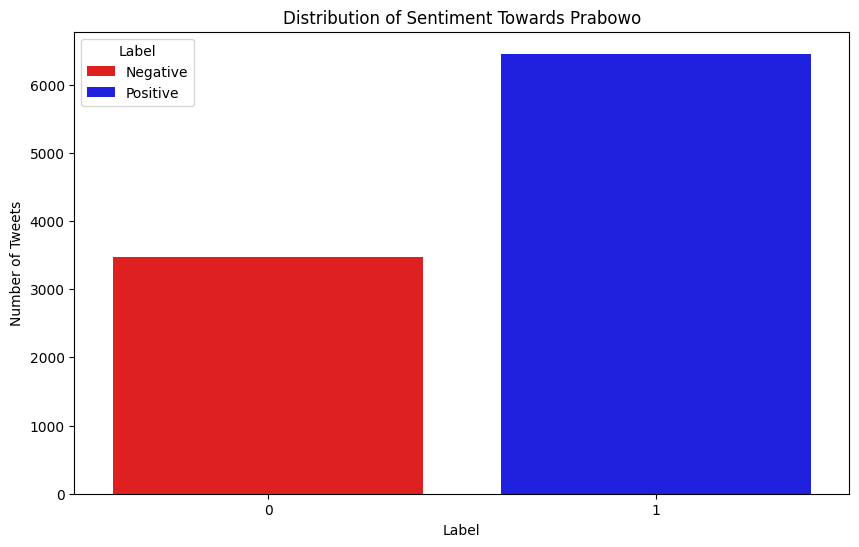

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='label',data=df_anies, hue='label', palette={1: 'blue', 0: 'red'})
plt.xlabel('Label')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Towards Prabowo')
plt.legend(title='Label', labels=['Negative', 'Positive'])
plt.show()

## WORD CLOUDS FOR PRABOWO SUBIANTO

In [ ]:
prabowo_positive_text = " ".join(df_prabowo[df_prabowo['label'] == 1]['clean_text'])
prabowo_negative_text = " ".join(df_prabowo[df_prabowo['label'] == 0]['clean_text'])

In [ ]:
prabowo_positive_text

'gemira and semeton bali muslims declare support for prabowo as president news updates this time jokowis quota for wrinkles on his face and white hair is identical to his aura sir moving on to answering sincerely and honestly agree thats great prabowo subianto happy birthday to kopassus may the spirit of patriotism continue to burn in our hearts be the front guard in maintaining the sovereignty and security of the republic of indonesia keep advancing kopassus always healthy mr general prabowo subianto president of the republic of indonesia some of the campaign activities of presidential candidates and vice presidential candidates facilitated by the state in the upcoming presidential election can be funded from the state revenue and expenditure budget of prabowo subiantos apbn gorontalo netizens pray for minister of defense prabowo subianto to become president of the republic of indonesia in prabowo subiantos presidential election im president but im still prabowo president of the repub

In [ ]:
more_stopwords_prabowo = {'pk', 'pak', 'good', 'indonesia', 'Unknown', 'president',
                      'presidential', 'bang', 'mr', 'republic', 'indonesia',
                      'election', 'candidate', 'candidates','park', 'jimin',
                      'inismyname', 'dont', 'gangar', 'prabowo', 'prabowos', 'subianto', 'subiantos'}

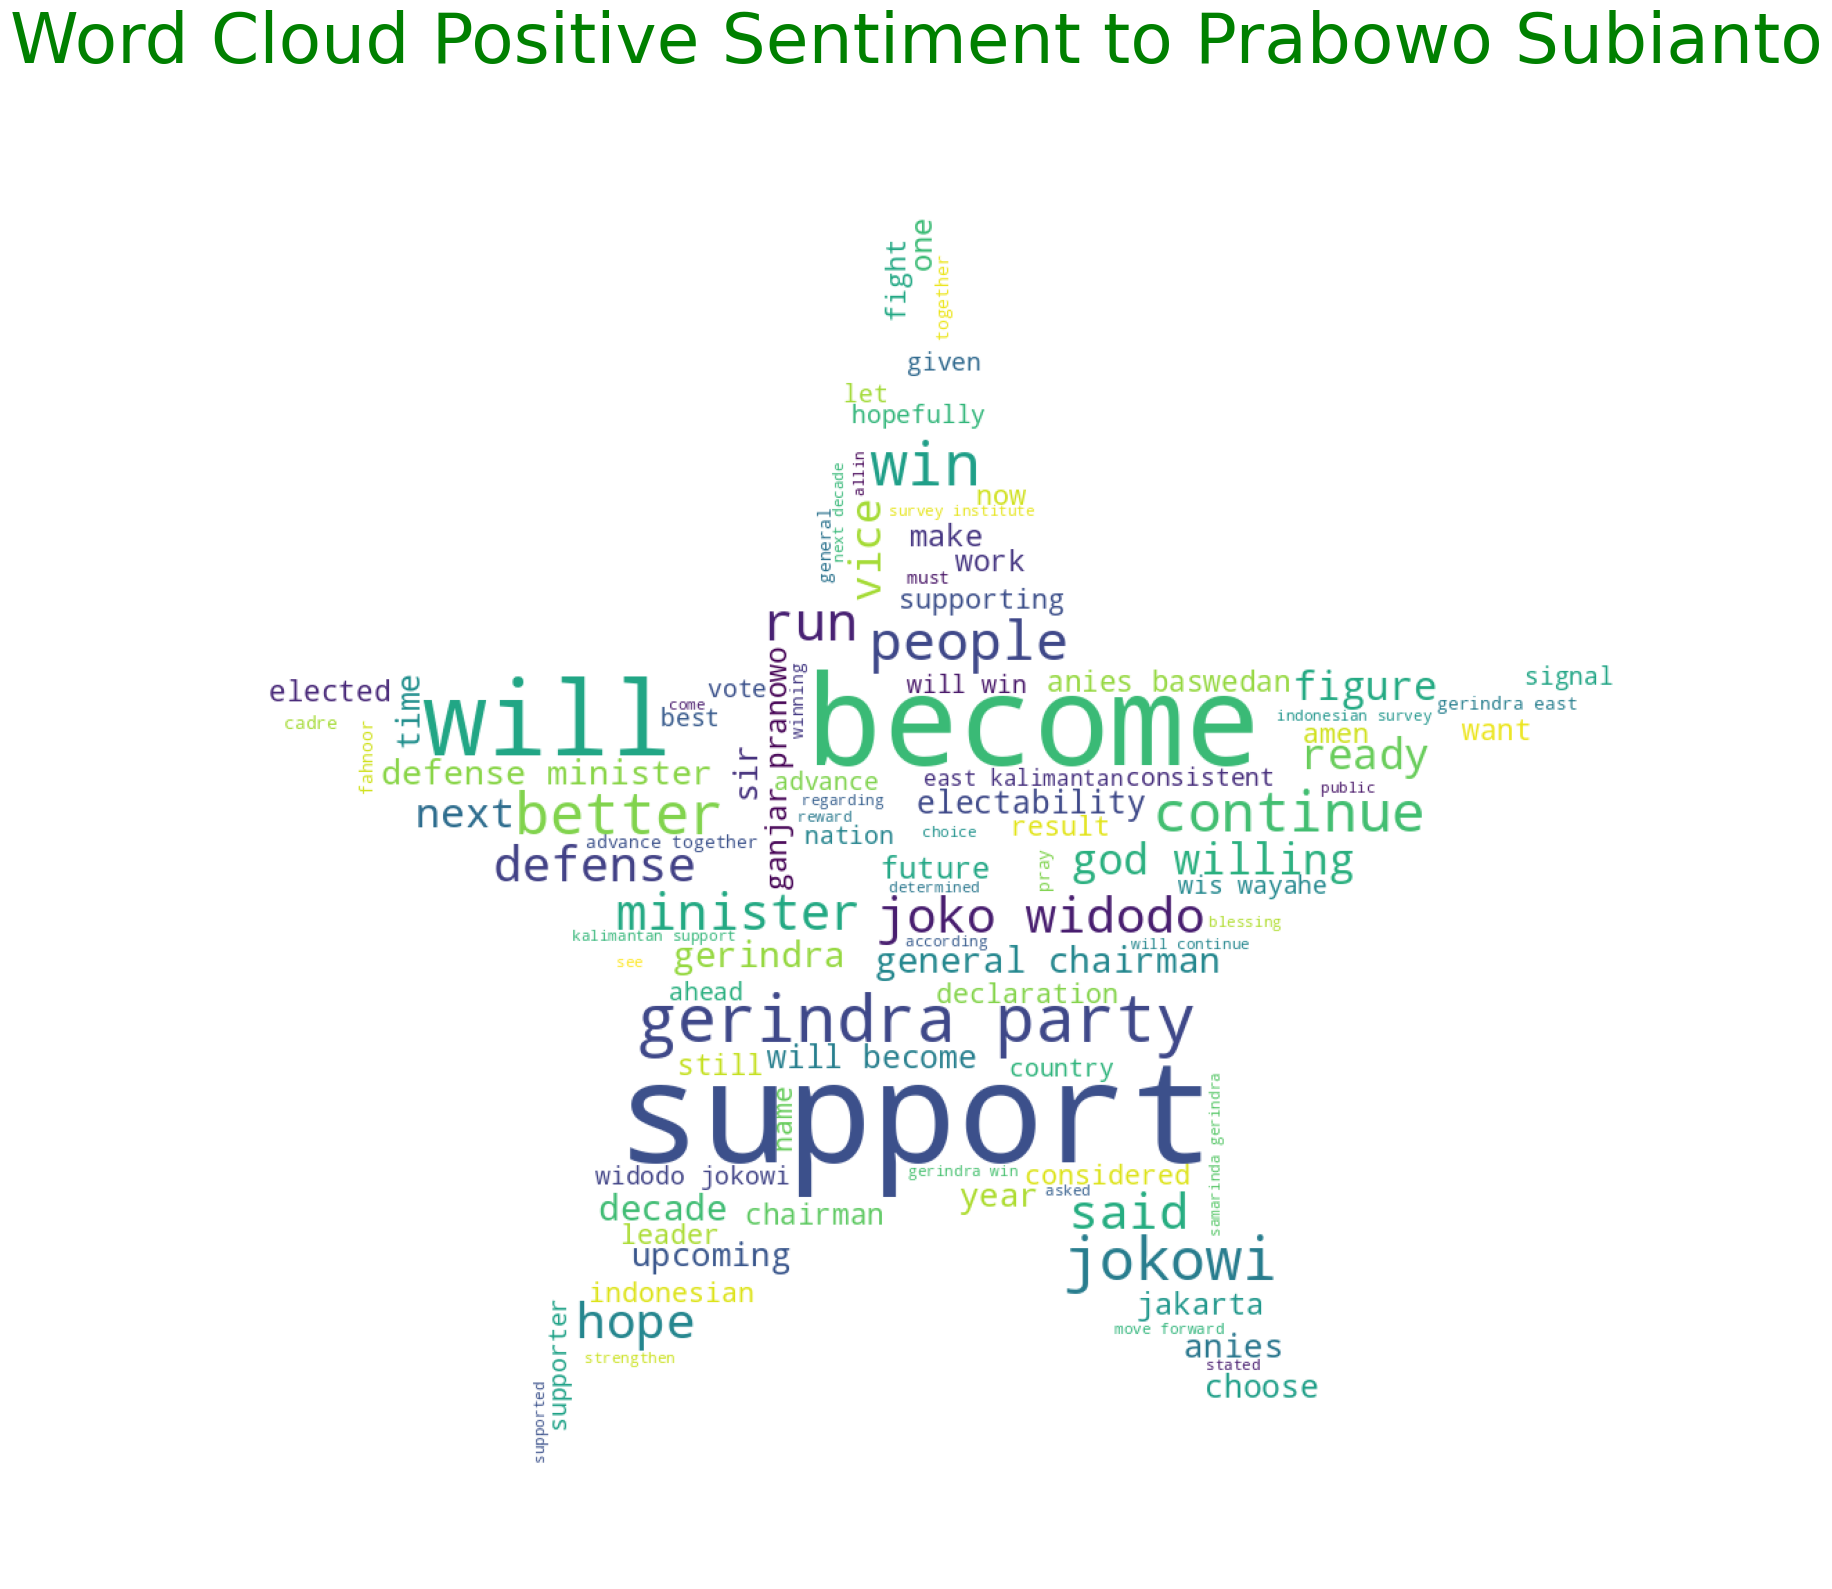

In [ ]:
#Positive cloud words about Prabowo Subianto
plot_wordcloud(prabowo_positive_text, positive_mask, max_words=100, max_font_size= 120, title="Word Cloud Positive Sentiment to Prabowo Subianto", title_size=50,
               more_stopwords=more_stopwords_prabowo)

<ipython-input-41-8c16e3f63b9f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words_pos_prab), x=list(counts_pos_prab), palette="viridis")


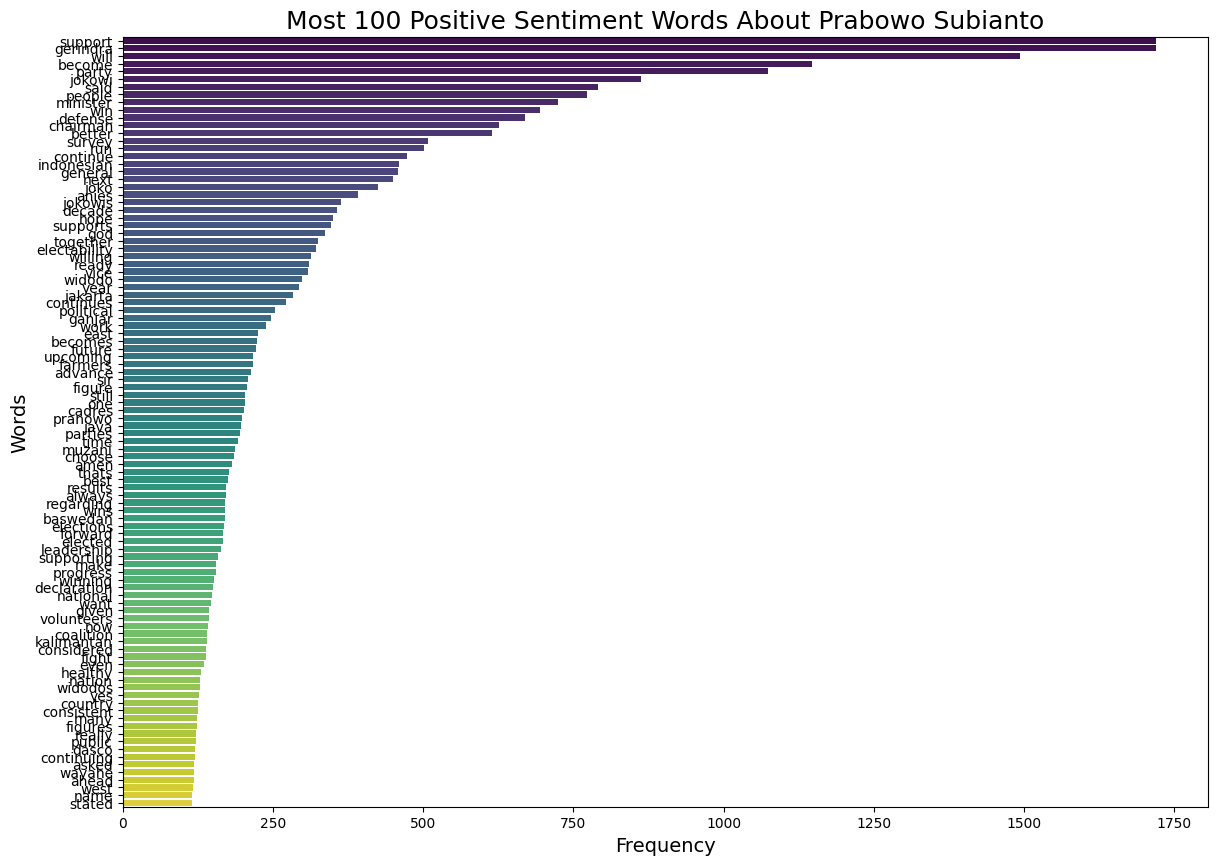

In [ ]:
stopwords_prab = set(STOPWORDS).union(more_stopwords_prabowo)

words_pos_prab = [word.lower() for word in prabowo_positive_text.split() if word.lower() not in stopwords_prab]

word_counts_pos_prab = Counter(words_pos_prab)

common_words_pos_prab = word_counts_pos_prab.most_common(100)
df_common_words_pos_prab = pd.DataFrame(common_words_pos_prab, columns=['Words', 'Frequency'])

#print(df_common_words)
words_pos_prab, counts_pos_prab = zip(*common_words_pos_prab)

plt.figure(figsize=(14,10))
sns.barplot(y=list(words_pos_prab), x=list(counts_pos_prab), palette="viridis")
plt.title('Most 100 Positive Sentiment Words About Prabowo Subianto', fontsize=18)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


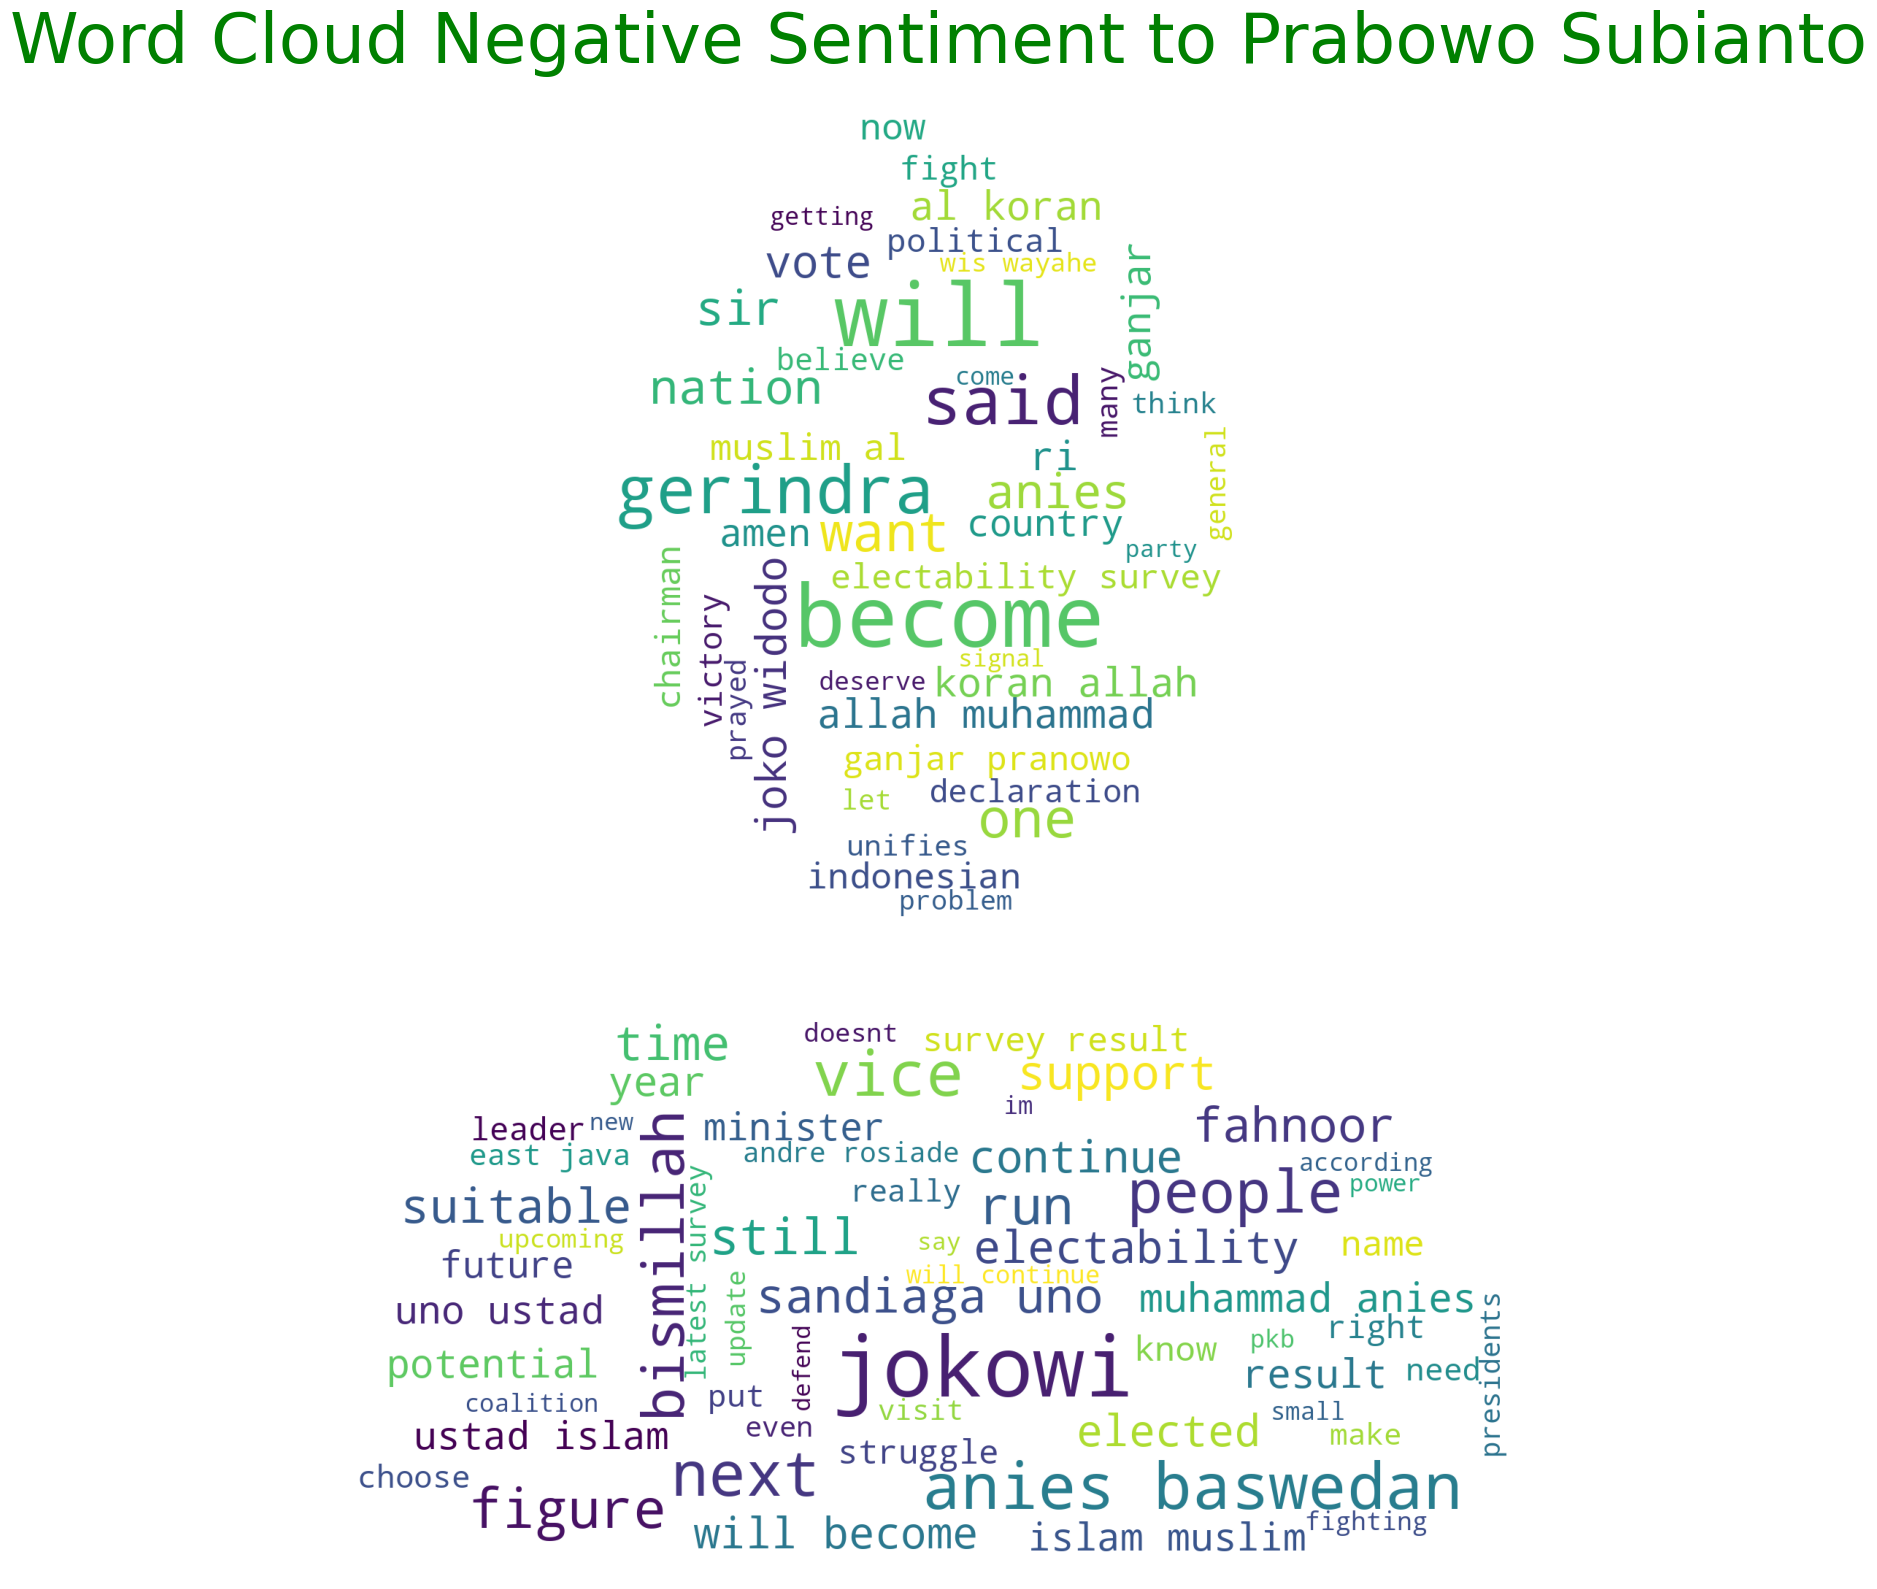

In [ ]:
#Negative cloud words about Prabowo Subianto
plot_wordcloud(prabowo_negative_text, negative_mask, max_words=100, max_font_size= 120, title="Word Cloud Negative Sentiment to Prabowo Subianto", title_size=50,
               more_stopwords=more_stopwords_prabowo)

<ipython-input-43-e288d99b28d8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words_neg_prab), x=list(counts_neg_prab), palette="viridis")


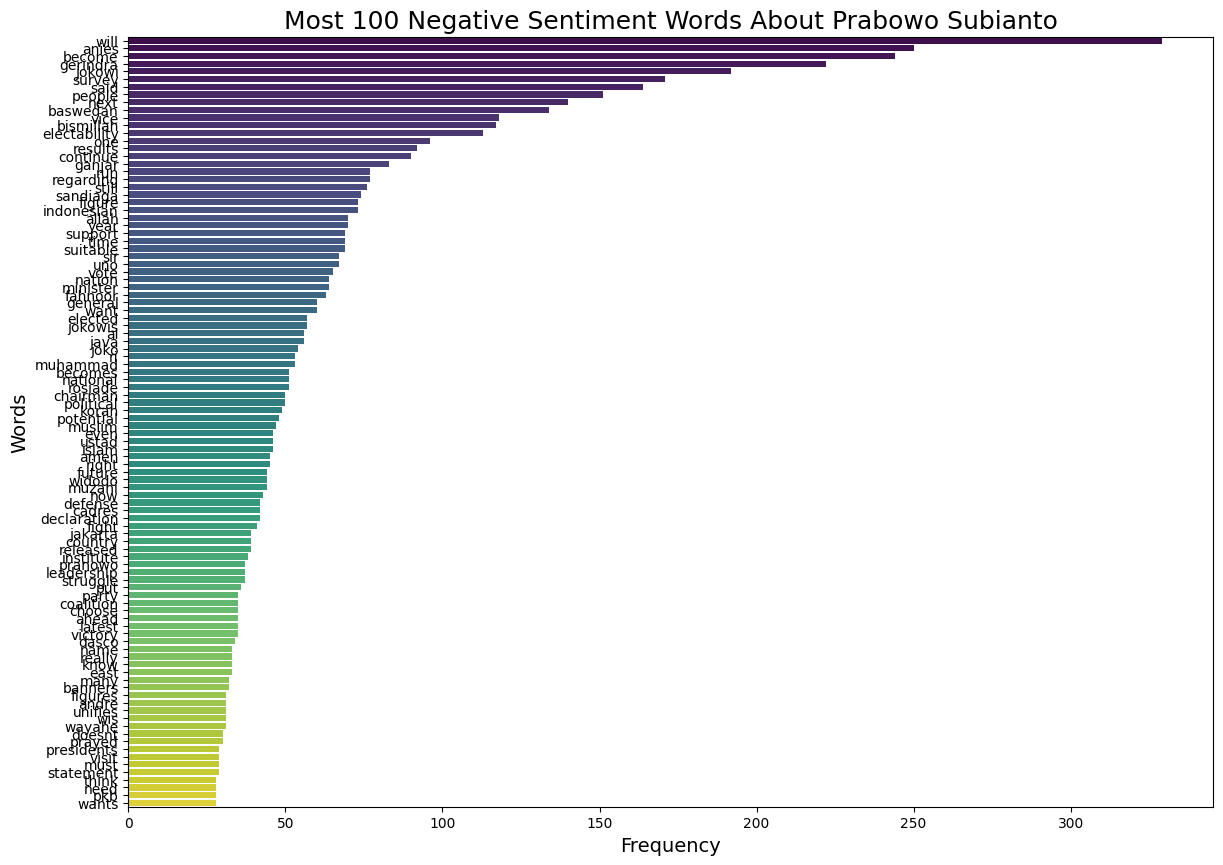

In [ ]:
words_neg_prab = [word.lower() for word in prabowo_negative_text.split() if word.lower() not in stopwords_prab]

word_counts_neg_prab = Counter(words_neg_prab)

common_words_neg_prab = word_counts_neg_prab.most_common(100)
df_common_words_neg_prab = pd.DataFrame(common_words_neg_prab, columns=['Words', 'Frequency'])

#print(df_common_words)
words_neg_prab, counts_neg_prab = zip(*common_words_neg_prab)

plt.figure(figsize=(14,10))
sns.barplot(y=list(words_neg_prab), x=list(counts_neg_prab), palette="viridis")
plt.title('Most 100 Negative Sentiment Words About Prabowo Subianto', fontsize=18)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


## SENTIMENT ANALYSIS ABOUT PRABOWO SUBIANTO
This section will dig deeper sentiment about Prabowo from the dataset. The process begins from balancing dataset, using Naive Bayes, ... , and using BERT

### Preprocess

In [ ]:
train_prabowo_x, train_prabowo_y = ros.fit_resample(np.array(df_prabowo[['clean_text']]).reshape(-1, 1), np.array(df_prabowo['label']).reshape(-1, 1));
train_prabowo_os = pd.DataFrame(list(zip([x[0] for x in train_prabowo_x], train_prabowo_y)),
                              columns=['clean_text', 'label']);
train_prabowo_os['label'].value_counts()

label
1    7369
0    7369
Name: count, dtype: int64

In [ ]:
# Train-validation-test split
X_prabowo = train_prabowo_os['clean_text'].values
y_prabowo = train_prabowo_os['label'].values

In [ ]:
# Split 0.6 training data and 0.4 temporary data
X_train_prabowo, X_temp_prabowo, y_train_prabowo, y_temp_prabowo = train_test_split(X_prabowo, y_prabowo, test_size=0.4, random_state=42)
# Split 0.2 validation data and 0.2 testing data
X_valid_prabowo, X_test_prabowo, y_valid_prabowo, y_test_prabowo = train_test_split(X_temp_prabowo, y_temp_prabowo, test_size=0.5, random_state=42)

In [ ]:
# Save the label-encoded target columns
y_train_prabowo_le = y_train_prabowo.copy()
y_valid_prabowo_le = y_valid_prabowo.copy()
y_test_prabowo_le = y_test_prabowo.copy()

In [ ]:
# One-hot encoding
ohe_prabowo = preprocessing.OneHotEncoder()
y_train_prabowo = ohe_prabowo.fit_transform(np.array(y_train_prabowo).reshape(-1, 1))
y_valid_prabowo = ohe_prabowo.transform(np.array(y_valid_prabowo).reshape(-1, 1))
y_test_prabowo = ohe_prabowo.transform(np.array(y_test_prabowo).reshape(-1, 1))

In [ ]:
print(f"PRABOWO'S TRAINING DATA: {X_train_prabowo.shape[0]}\nPRABOWO'S VALIDATION DATA: {X_valid_prabowo.shape[0]}\nPRABOWO'S TESTING DATA: {X_test_prabowo.shape[0]}" )

PRABOWO'S TRAINING DATA: 8842
PRABOWO'S VALIDATION DATA: 2948
PRABOWO'S TESTING DATA: 2948


### Naive Bayes For Prabowo Subianto




In [ ]:
X_train_prabowo_cv = clf.fit_transform(X_train_prabowo)
X_test_prabowo_cv = clf.transform(X_test_prabowo)

In [ ]:
#TF-IDF (Term-frequency times inverse document-frequency) versions of the tokenized tweets
tf_prabowo_transformer = TfidfTransformer(use_idf=True).fit(X_train_prabowo_cv)
X_train_prabowo_tf = tf_prabowo_transformer.transform(X_train_prabowo_cv)
X_test_prabowo_tf = tf_prabowo_transformer.transform(X_test_prabowo_cv)

In [ ]:
nb_prabowo_clf = MultinomialNB()
nb_prabowo_clf.fit(X_train_prabowo_tf, y_train_prabowo_le)

MultinomialNB()

In [ ]:
nb_prabowo_pred = nb_prabowo_clf.predict(X_test_prabowo_tf)

In [ ]:
print('\tClassification Report for Prabowo Sentiment using Naive Bayes:\n\n',classification_report(y_test_prabowo_le,nb_prabowo_pred, target_names=['Negative', 'Positive']))

	Classification Report for Prabowo Sentiment using Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.88      0.85      0.87      1437
    Positive       0.86      0.89      0.88      1511

    accuracy                           0.87      2948
   macro avg       0.87      0.87      0.87      2948
weighted avg       0.87      0.87      0.87      2948



# GANJAR PRANOWO
Ganjar's analysis part

## GANJAR'S DATASET

In [ ]:
df_ganjar

Tweet Count                                               Text  label  \
0            13665  ganjar is getting more and more support, now s...      1   
1              621  ojoo lali yooo who is smart chooses pranowo's ...      1   
2              621       smart people support and reward pranowo well      1   
3              737  we believe that pranowo's reward is a gift fro...      1   
4              621  intelligent people support and reward pranowo ...      1   
...            ...                                                ...    ...   
9995           414  rt ganjaristdltras ganjarist deltras east java...      1   
9996          3662               meaning reward pranowo the president      1   
9997          2245  more and more people are ready to support ganj...      1   
9998            25  rt ganjaristdltras ganjarist deltras east java...      1   
9999           202  happy national aviation day october, fly high ...      1   

           Candidate                                         clean_text  
0     Ganjar Pranowo  ganjar is getting more and more support now su...  
1     Ganjar Pranowo  ojoo lali yooo who is smart chooses pranowos r...  
2     Ganjar Pranowo       smart people support and reward pranowo well  
3     Ganjar Pranowo  we believe that pranowos reward is a gift from...  
4     Ganjar Pranowo  intelligent people support and reward pranowo ...  
...              ...                                                ...  
9995  Ganjar Pranowo  rt ganjaristdltras ganjarist deltras east java...  
9996  Ganjar Pranowo               meaning reward pranowo the president  
9997  Ganjar Pranowo  more and more people are ready to support ganj...  
9998  Ganjar Pranowo  rt ganjaristdltras ganjarist deltras east java...  
9999  Ganjar Pranowo  happy national aviation day october fly high w...  

[9885 rows x 5 columns]

In [ ]:
df_ganjar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9885 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Tweet Count  9885 non-null   int64 
 1   Text          9885 non-null   object
 2   label         9885 non-null   int64 
 3   Candidate     9885 non-null   object
 4   clean_text    9885 non-null   object
dtypes: int64(2), object(3)
memory usage: 463.4+ KB


In [ ]:
temp = df_prabowo.groupby('label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')

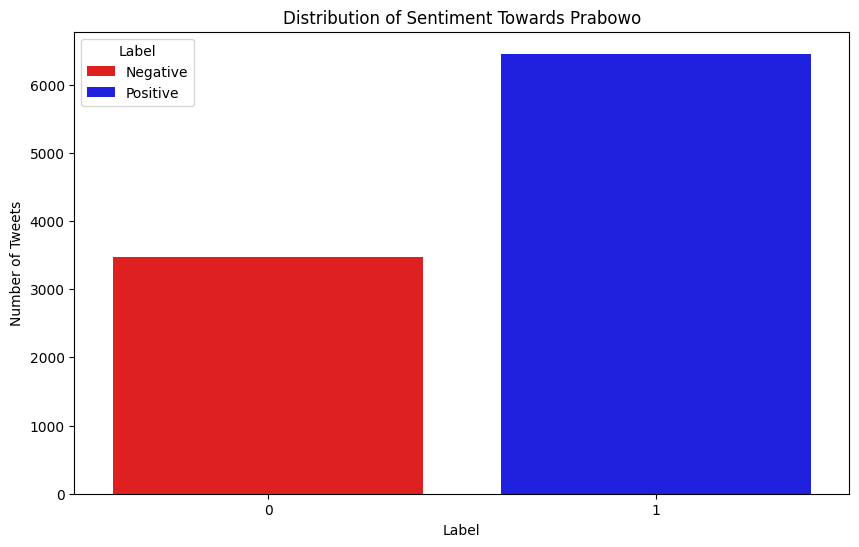

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='label',data=df_anies, hue='label', palette={1: 'blue', 0: 'red'})
plt.xlabel('Label')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Towards Prabowo')
plt.legend(title='Label', labels=['Negative', 'Positive'])
plt.show()

## WORD CLOUDS FOR GANJAR PRANOWO

In [ ]:
ganjar_positive_text = " ".join(df_ganjar[df_ganjar['label'] == 1]['clean_text'])
ganjar_negative_text = " ".join(df_ganjar[df_ganjar['label'] == 0]['clean_text'])

In [ ]:
ganjar_positive_text

'ganjar is getting more and more support now support is coming from the city of batu malang east java they have declared themselves as supporters of the president of the republic of indonesia not only coming from malang district but also from blitar and others ojoo lali yooo who is smart chooses pranowos reward smart people support and reward pranowo well we believe that pranowos reward is a gift from allah almighty for the indonesian nation after jokowi is named a gift god willing there will be no power that can hinder or hinder the presidents reward in intelligent people support and reward pranowo well thank god the president of indonesia is the only one who can unite this nation prabowo subianto and anis baswed and these two candidates have a track record of being surrounded by kadrun and sandalwood ramadhan safari and prayer together for mr ganjar pranowo president of indonesia in this activity we collaborated with the nations childrens observer forum community of course in this ra

In [ ]:
more_stopwords_ganjar = {'pk', 'pak', 'good', 'indonesia', 'Unknown', 'president',
                      'presidential', 'bang', 'mr', 'republic', 'indonesia',
                      'election', 'candidate', 'candidates','park', 'jimin',
                      'inismyname', 'dont', 'gangar', 'ganjar', 'pranowo', 'pranowos'}

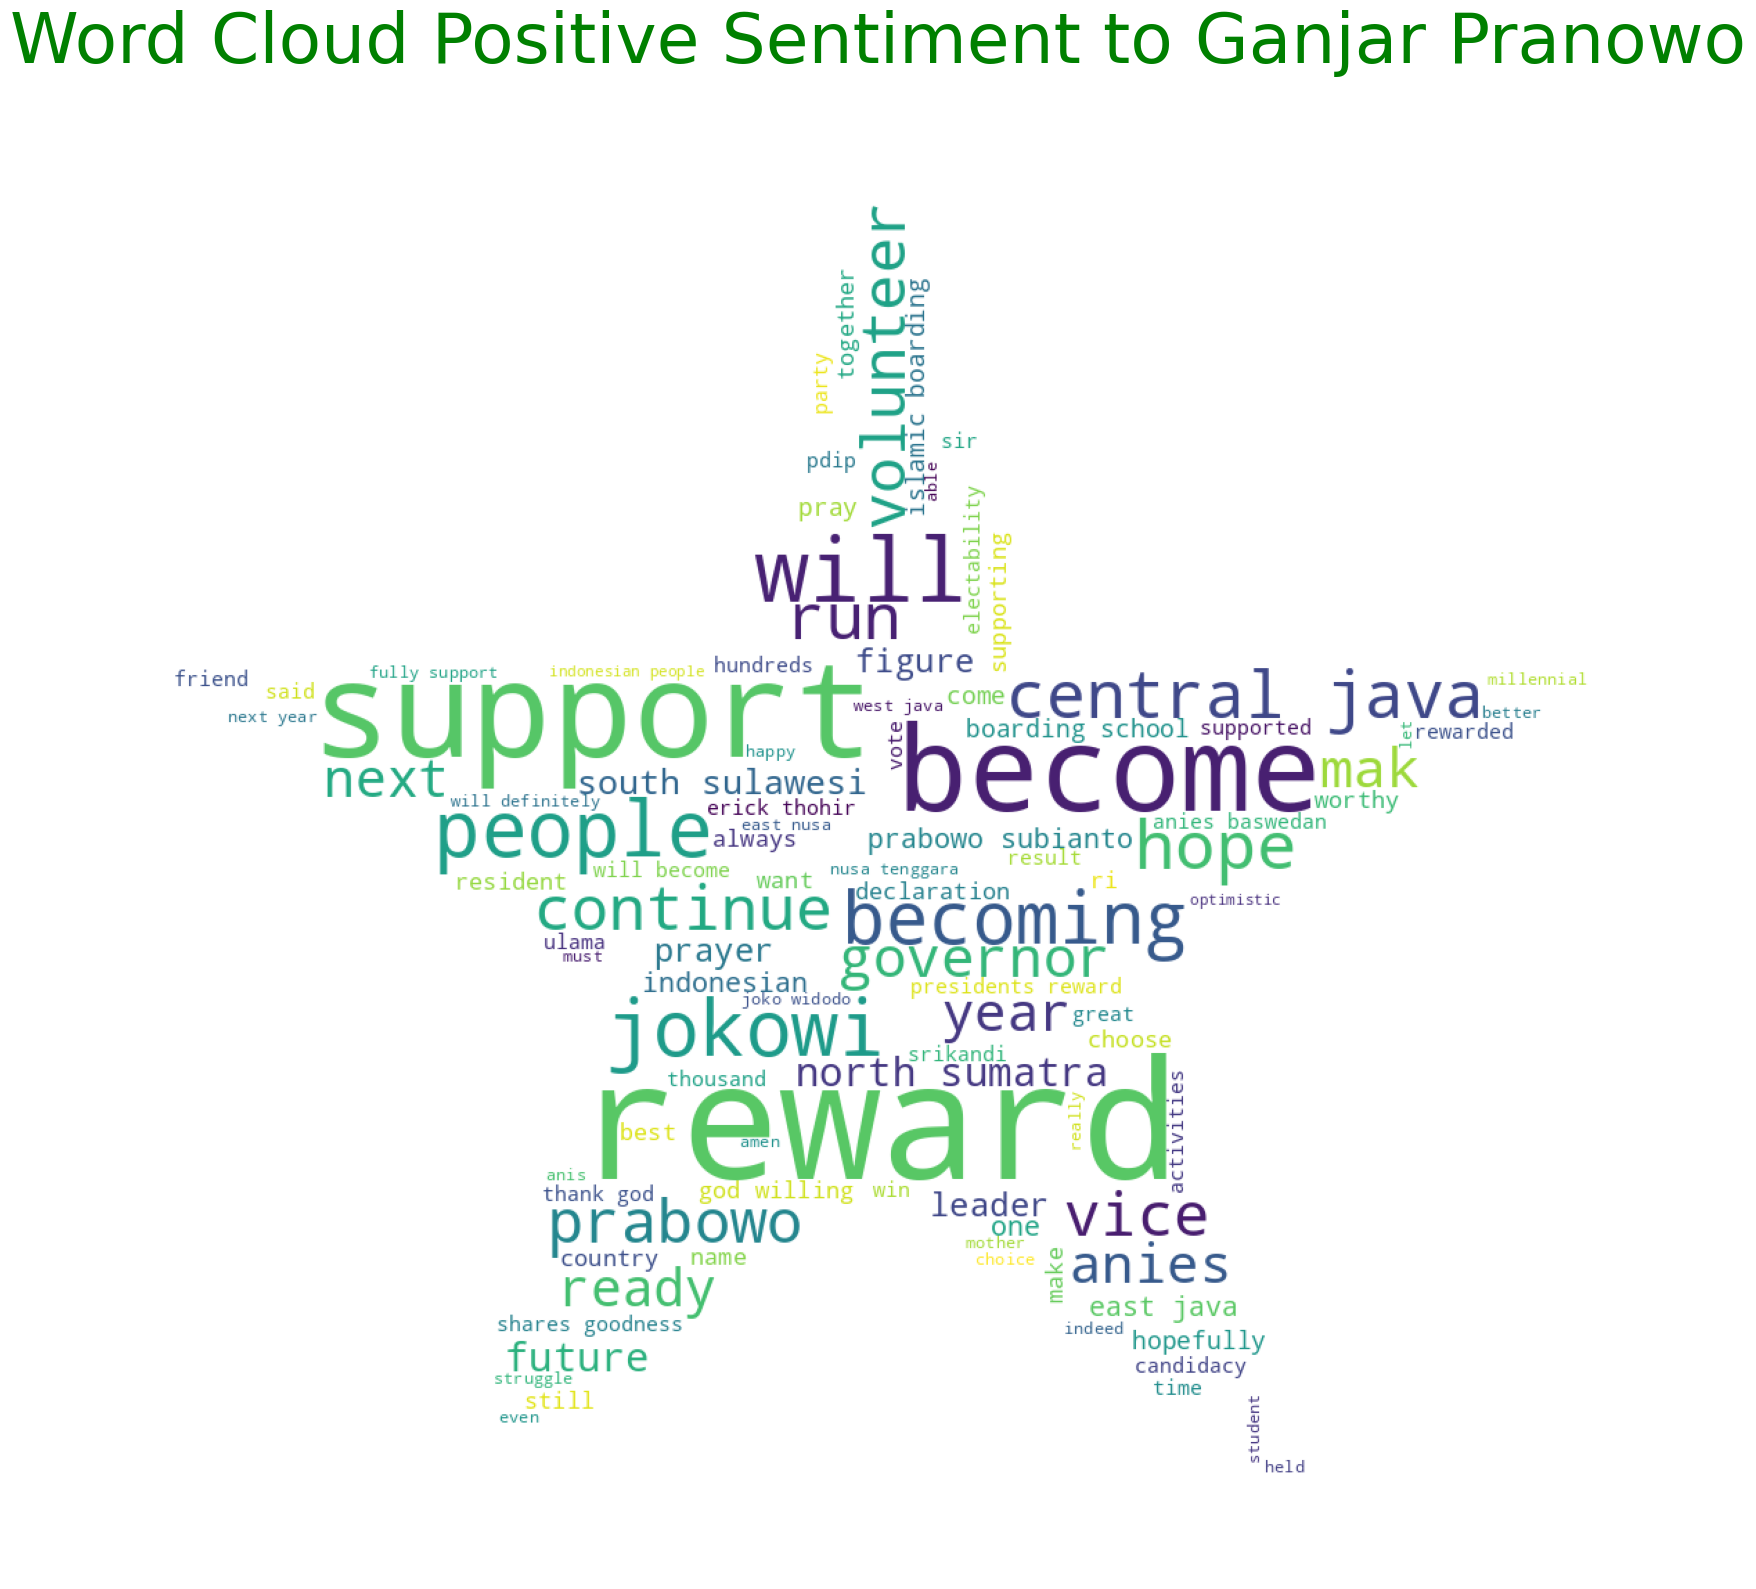

In [ ]:
#Positive cloud words about Ganjar Pranowo
plot_wordcloud(ganjar_positive_text, positive_mask, max_words=100, max_font_size= 120, title="Word Cloud Positive Sentiment to Ganjar Pranowo", title_size=50,
               more_stopwords=more_stopwords_ganjar)

<ipython-input-53-f092bab9d270>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words_pos_gan), x=list(counts_pos_gan), palette="viridis")


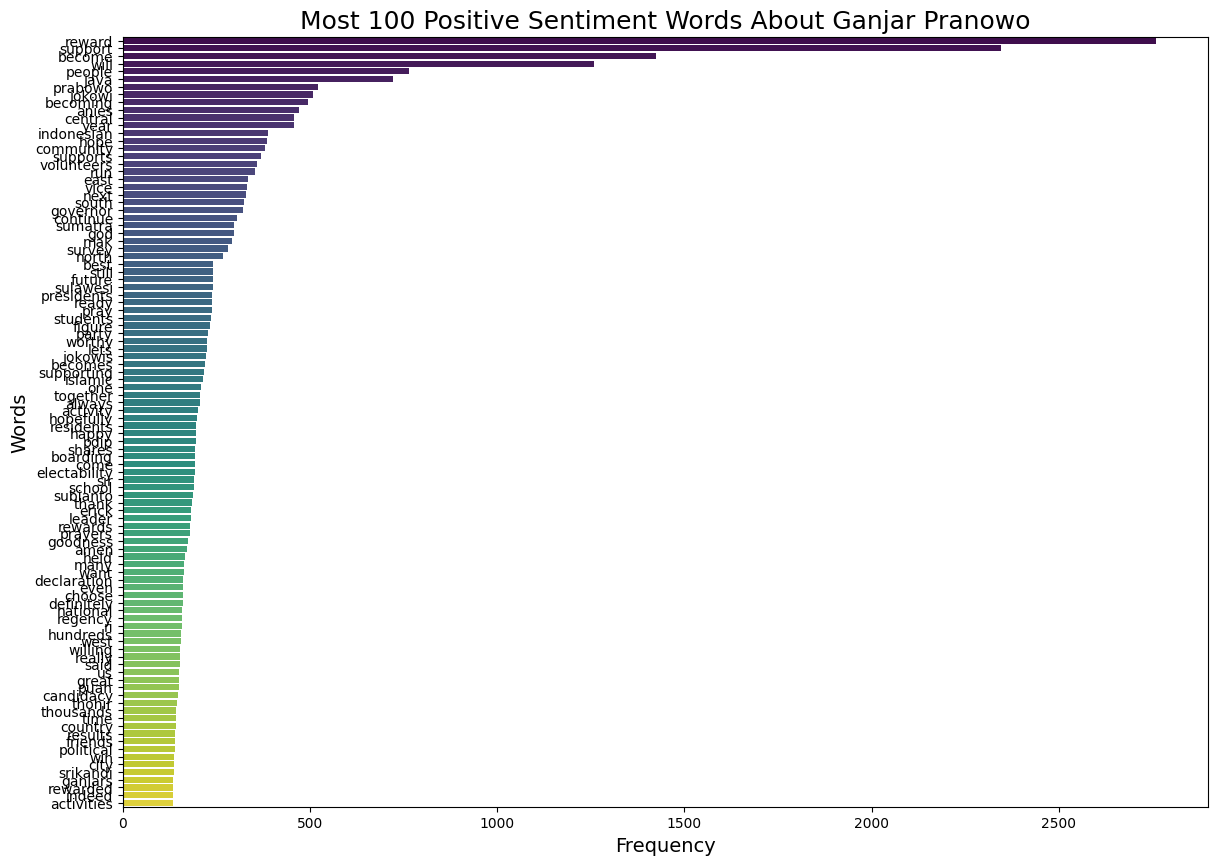

In [ ]:
stopwords_gan = set(STOPWORDS).union(more_stopwords_ganjar)

words_pos_gan = [word.lower() for word in ganjar_positive_text.split() if word.lower() not in stopwords_gan]

word_counts_pos_gan = Counter(words_pos_gan)

common_words_pos_gan = word_counts_pos_gan.most_common(100)
df_common_words_pos_gan = pd.DataFrame(common_words_pos_gan, columns=['Words', 'Frequency'])

#print(df_common_words)
words_pos_gan, counts_pos_gan = zip(*common_words_pos_gan)

plt.figure(figsize=(14,10))
sns.barplot(y=list(words_pos_gan), x=list(counts_pos_gan), palette="viridis")
plt.title('Most 100 Positive Sentiment Words About Ganjar Pranowo', fontsize=18)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()


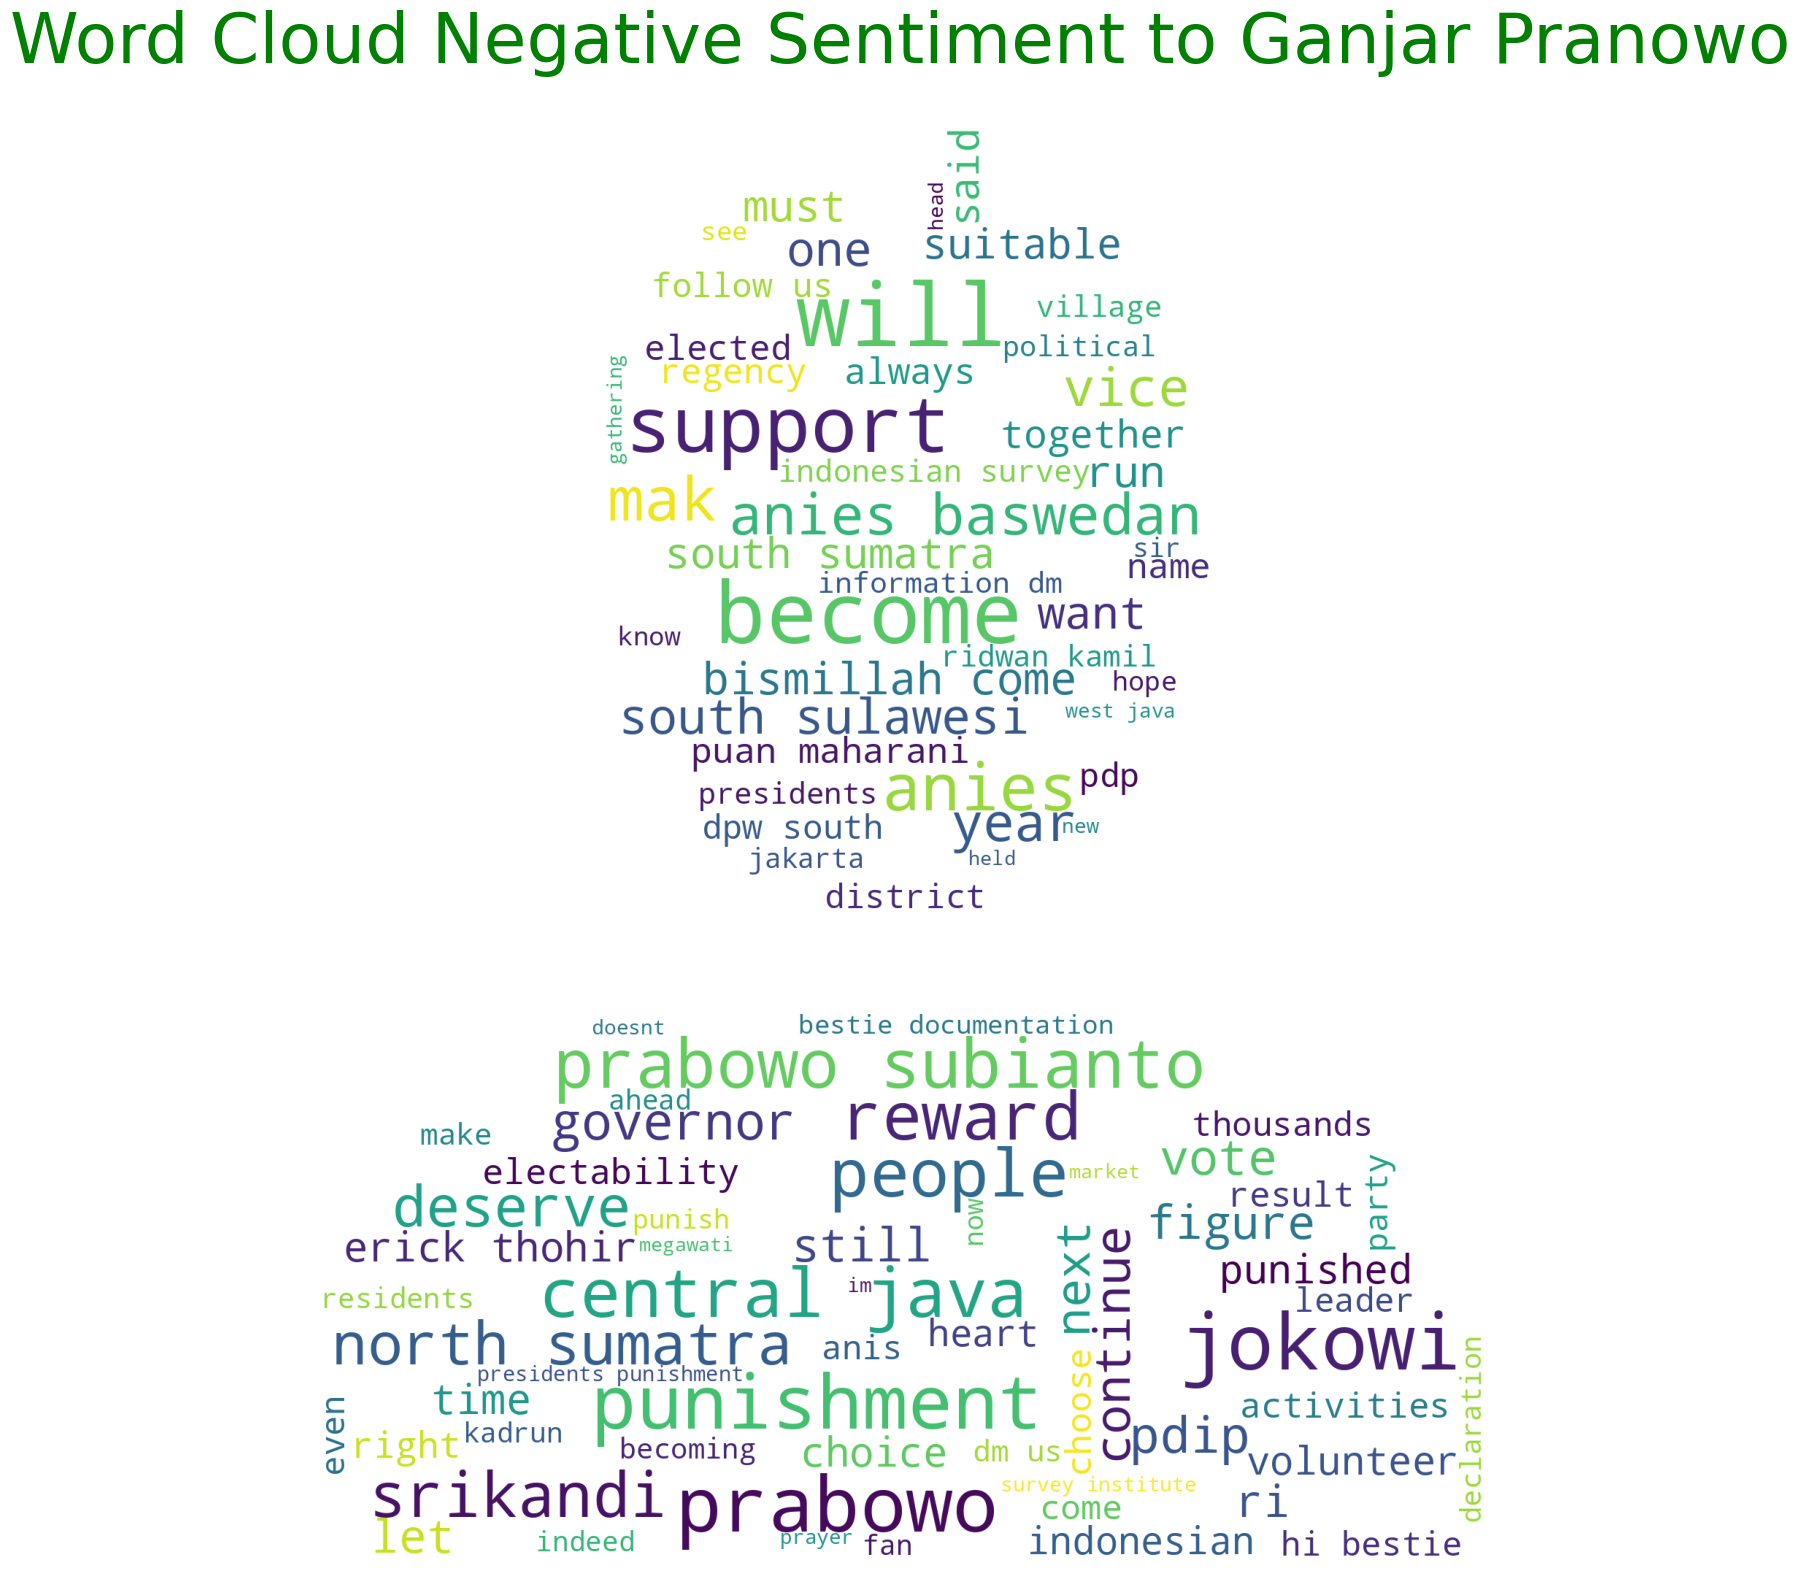

In [ ]:
#Negative cloud words about Ganjar Pranowo
plot_wordcloud(ganjar_negative_text, negative_mask, max_words=100, max_font_size= 120, title="Word Cloud Negative Sentiment to Ganjar Pranowo", title_size=50,
               more_stopwords=more_stopwords_ganjar)

<ipython-input-55-74c0c52523b0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words_neg_gan), x=list(counts_neg_gan), palette="viridis")


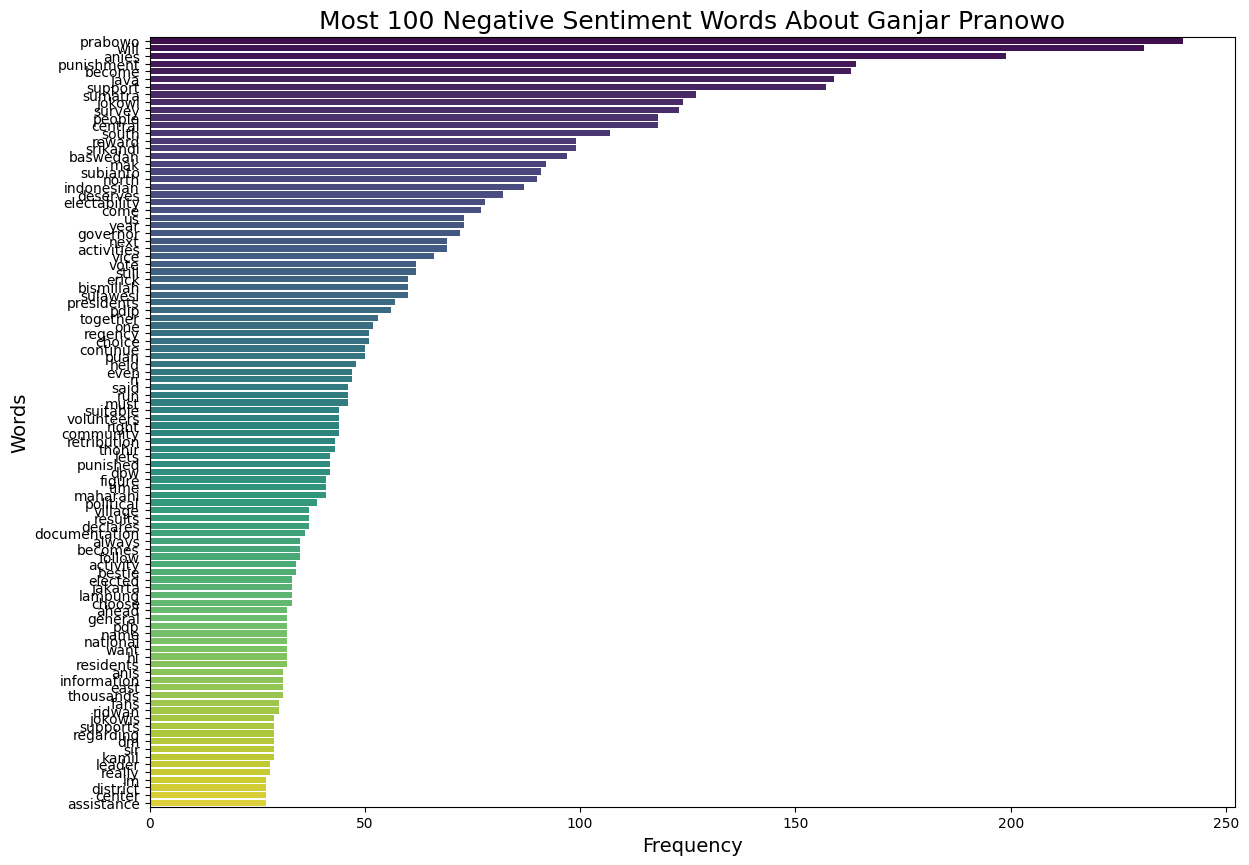

In [ ]:
words_neg_gan = [word.lower() for word in ganjar_negative_text.split() if word.lower() not in stopwords_gan]

word_counts_neg_gan = Counter(words_neg_gan)

common_words_neg_gan = word_counts_neg_gan.most_common(100)
df_common_words_neg_gan = pd.DataFrame(common_words_neg_gan, columns=['Words', 'Frequency'])

#print(df_common_words)
words_neg_gan, counts_neg_gan = zip(*common_words_neg_gan)

plt.figure(figsize=(14,10))
sns.barplot(y=list(words_neg_gan), x=list(counts_neg_gan), palette="viridis")
plt.title('Most 100 Negative Sentiment Words About Ganjar Pranowo', fontsize=18)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.show()

## SENTIMENT ANALYSIS ABOUT GANJAR PRANOWO


### Preprocess

In [ ]:
train_ganjar_x, train_ganjar_y = ros.fit_resample(np.array(df_ganjar[['clean_text']]).reshape(-1, 1), np.array(df_ganjar['label']).reshape(-1, 1));
train_ganjar_os = pd.DataFrame(list(zip([x[0] for x in train_ganjar_x], train_ganjar_y)),
                              columns=['clean_text', 'label']);
train_ganjar_os['label'].value_counts()

label
1    7831
0    7831
Name: count, dtype: int64

In [ ]:
# Train-validation-test split
X_ganjar = train_ganjar_os['clean_text'].values
y_ganjar = train_ganjar_os['label'].values

In [ ]:
# Split 0.6 training data and 0.4 temporary data
X_train_ganjar, X_temp_ganjar, y_train_ganjar, y_temp_ganjar = train_test_split(X_ganjar, y_ganjar, test_size=0.4, random_state=42)
# Split 0.2 validation data and 0.2 testing data
X_valid_ganjar, X_test_ganjar, y_valid_ganjar, y_test_ganjar = train_test_split(X_temp_ganjar, y_temp_ganjar, test_size=0.5, random_state=42)

In [ ]:
# Save the label-encoded target columns
y_train_ganjar_le = y_train_ganjar.copy()
y_valid_ganjar_le = y_valid_ganjar.copy()
y_test_ganjar_le = y_test_ganjar.copy()

In [ ]:
# One-hot encoding
ohe_ganjar = preprocessing.OneHotEncoder()
y_train_ganjar = ohe_ganjar.fit_transform(np.array(y_train_ganjar).reshape(-1, 1))
y_valid_ganjar = ohe_ganjar.transform(np.array(y_valid_ganjar).reshape(-1, 1))
y_test_ganjar = ohe_ganjar.transform(np.array(y_test_ganjar).reshape(-1, 1))

In [ ]:
print(f"GANJAR'S TRAINING DATA: {X_train_ganjar.shape[0]}\nGANJAR'S VALIDATION DATA: {X_valid_ganjar.shape[0]}\nGANJAR'S TESTING DATA: {X_test_ganjar.shape[0]}" )

GANJAR'S TRAINING DATA: 9397
GANJAR'S VALIDATION DATA: 3132
GANJAR'S TESTING DATA: 3133


### Naive Bayes For Ganjar Pranowo

In [ ]:
X_train_ganjar_cv = clf.fit_transform(X_train_ganjar)
X_test_ganjar_cv = clf.transform(X_test_ganjar)

In [ ]:
#TF-IDF (Term-frequency times inverse document-frequency) versions of the tokenized tweets
tf_ganjar_transformer = TfidfTransformer(use_idf=True).fit(X_train_ganjar_cv)
X_train_ganjar_tf = tf_ganjar_transformer.transform(X_train_ganjar_cv)
X_test_ganjar_tf = tf_ganjar_transformer.transform(X_test_ganjar_cv)

In [ ]:
nb_ganjar_clf = MultinomialNB()
nb_ganjar_clf.fit(X_train_ganjar_tf, y_train_ganjar_le)

MultinomialNB()

In [ ]:
nb_ganjar_pred = nb_ganjar_clf.predict(X_test_ganjar_tf)

In [ ]:
print('\tClassification Report for Ganjar Sentiment using Naive Bayes:\n\n',classification_report(y_test_ganjar_le,nb_ganjar_pred, target_names=['Negative', 'Positive']))

	Classification Report for Ganjar Sentiment using Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      1548
    Positive       0.88      0.89      0.89      1585

    accuracy                           0.88      3133
   macro avg       0.88      0.88      0.88      3133
weighted avg       0.88      0.88      0.88      3133

